In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
vaccine_df = pd.read_csv('/content/drive/MyDrive/h1n1_vaccine_prediction.csv')

In [3]:
vaccine_df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vaccine_df.shape

(26707, 34)

In [5]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
vaccine_df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
vaccine_df.isnull().sum()/len(vaccine_df)*100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [8]:
vaccine_df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [9]:
l =  ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker','is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','qualification',
       'income_level', 'marital_status', 'housing_status',
       'employment','no_of_adults', 'no_of_children']

In [10]:
for i in l:
  vaccine_df[i].fillna(vaccine_df[i].mode()[0], inplace=True)

In [11]:
vaccine_df.drop(['unique_id','has_health_insur'],axis=1,inplace=True)

In [12]:
vaccine_df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [13]:
vaccine_df.describe(include="all")

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707,26707,26707,26707,26707,26707,26707,26707.000000,26707.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,17200,14963,20778,15023,11645,NaN,NaN,NaN
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887558,0.529599,0.212454
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.749980,0.925264,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [14]:
l = vaccine_df.columns

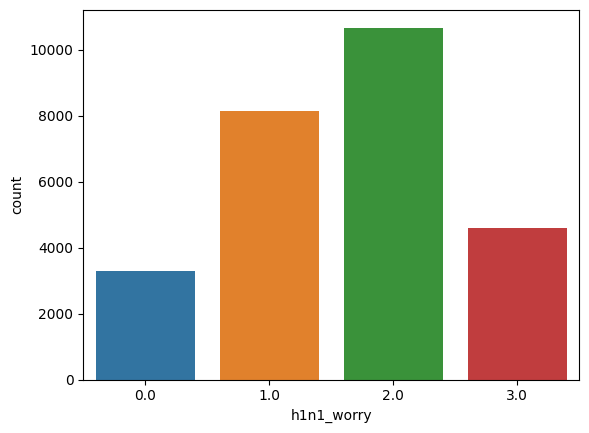

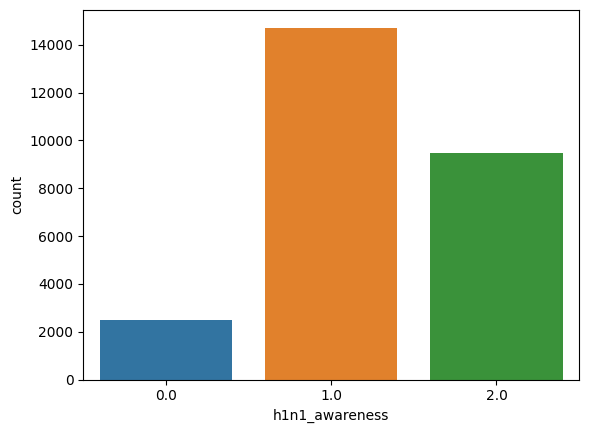

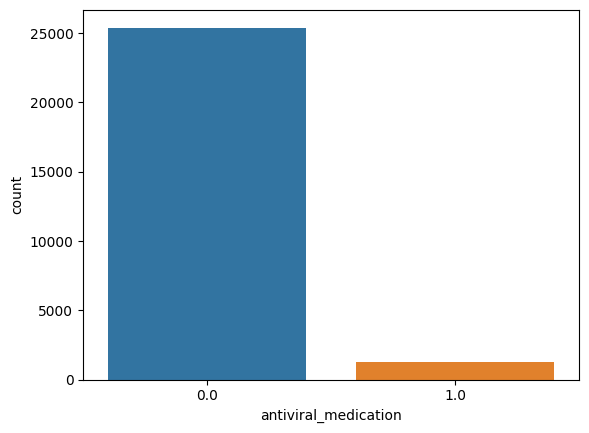

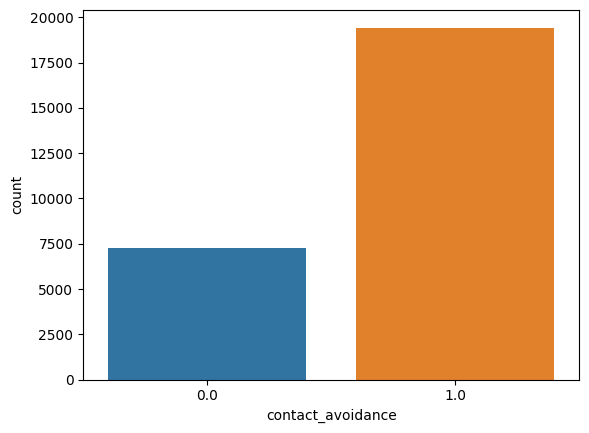

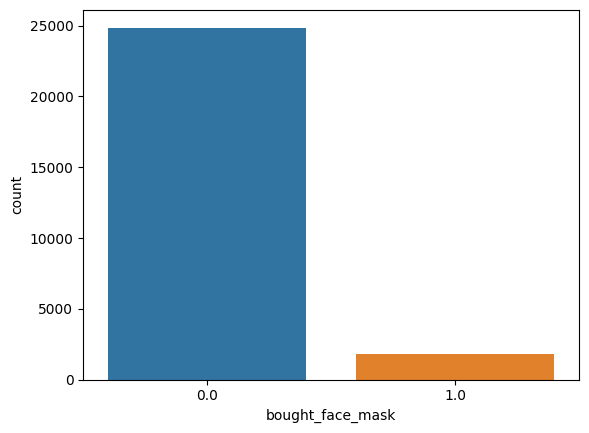

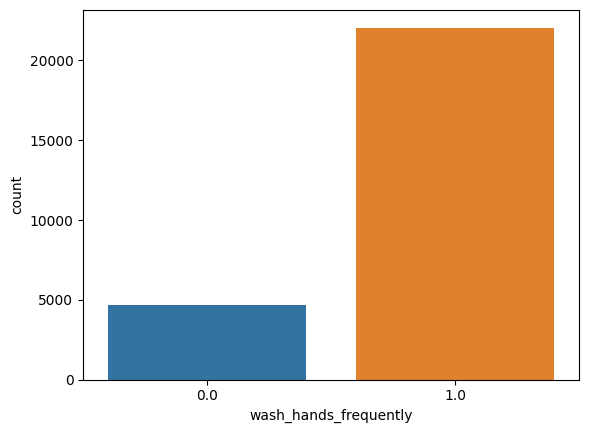

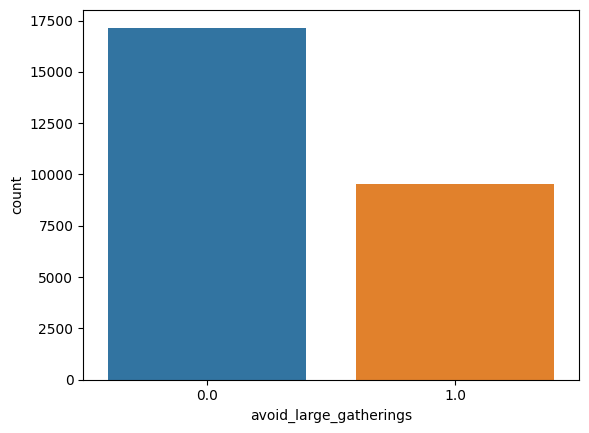

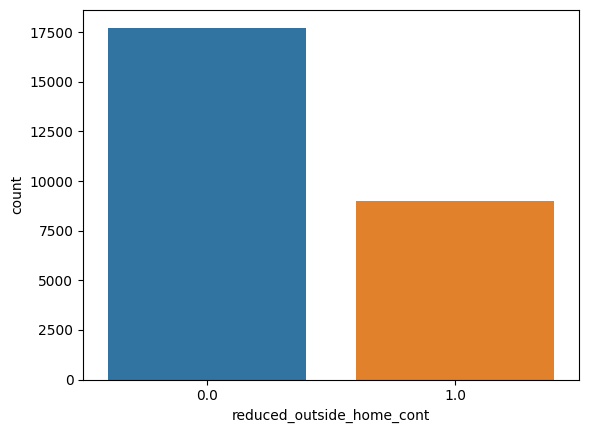

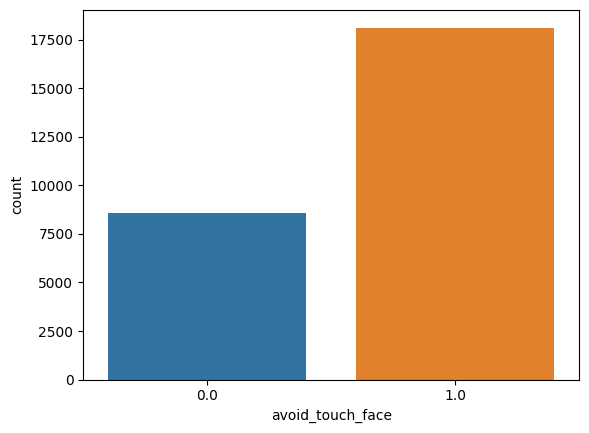

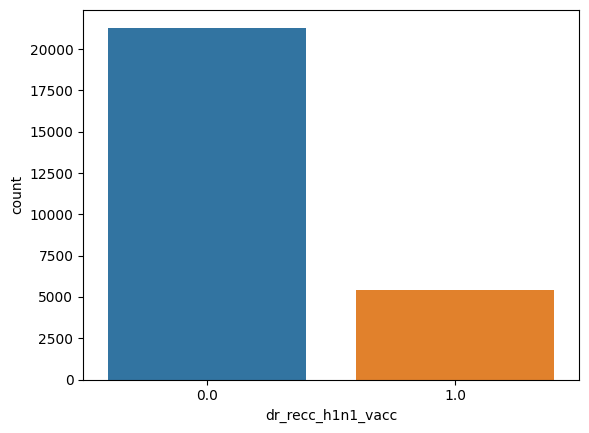

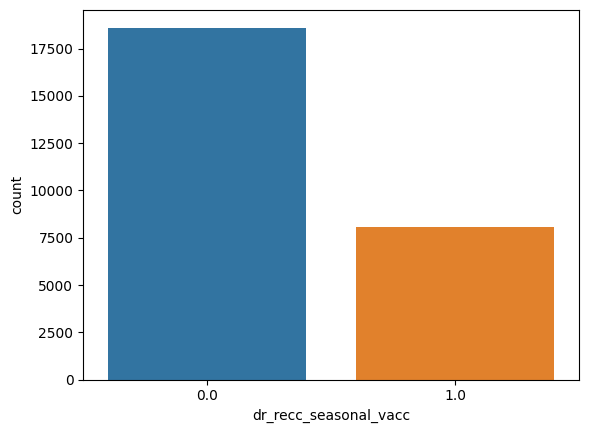

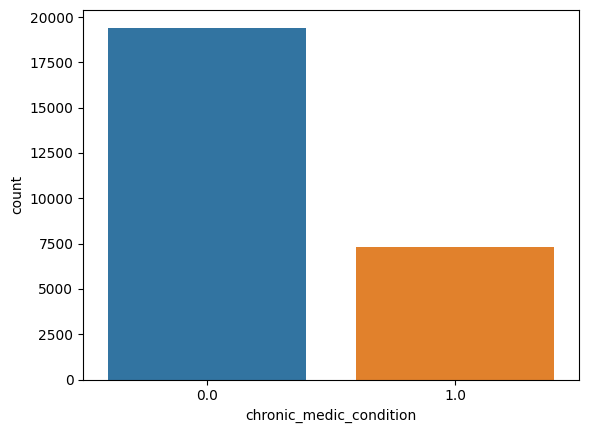

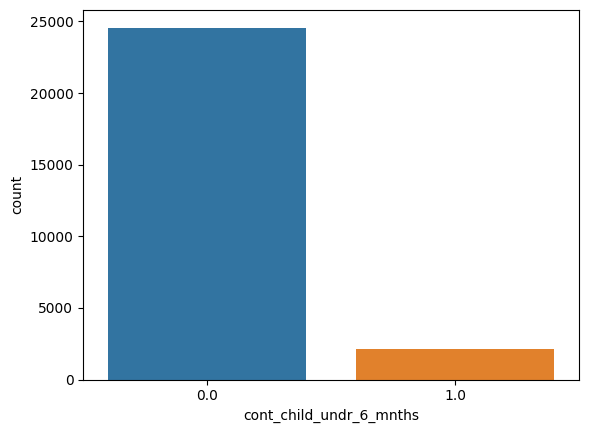

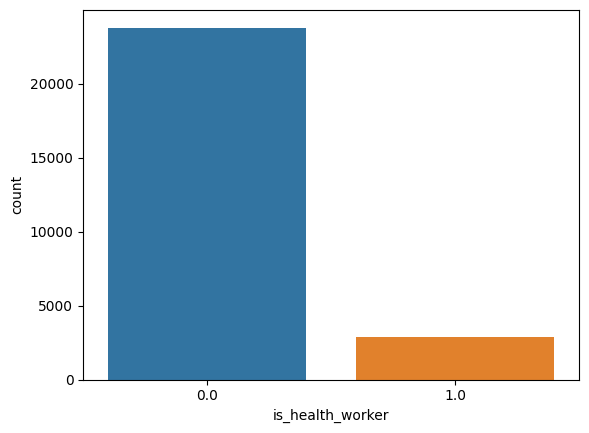

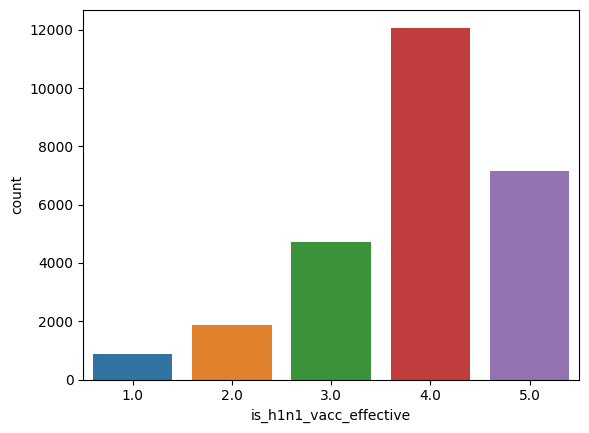

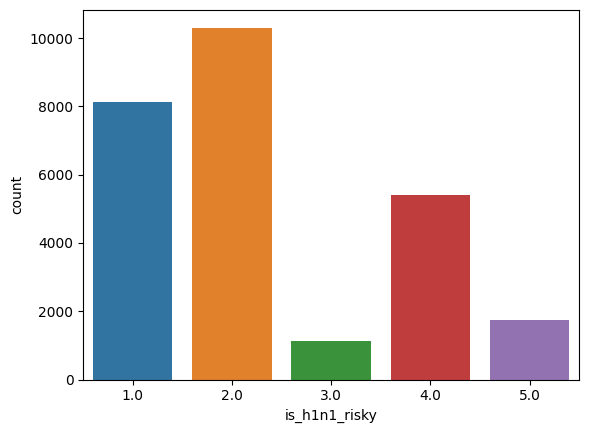

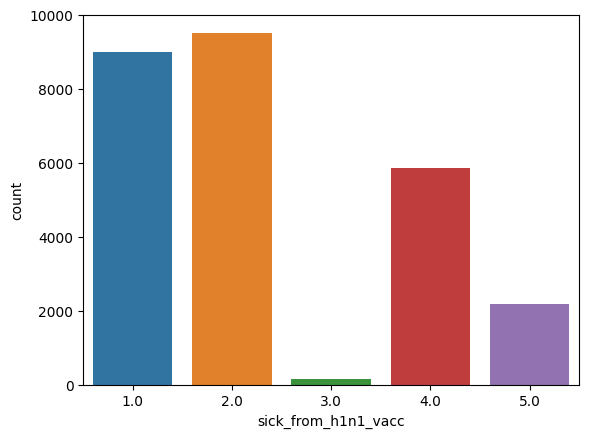

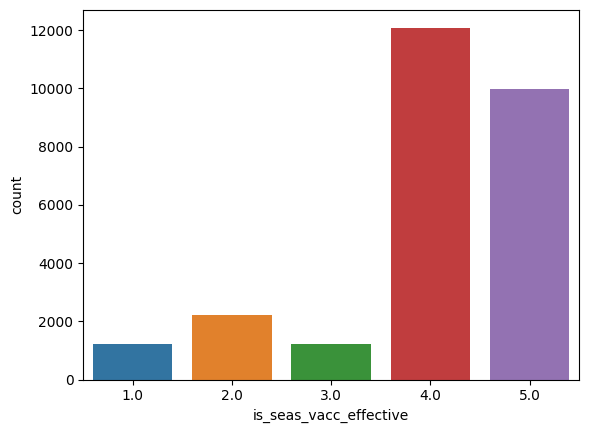

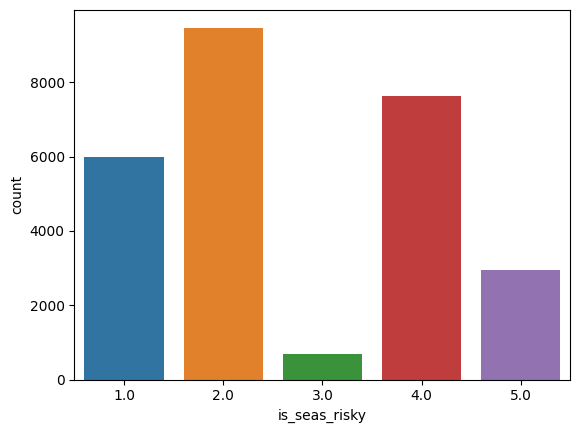

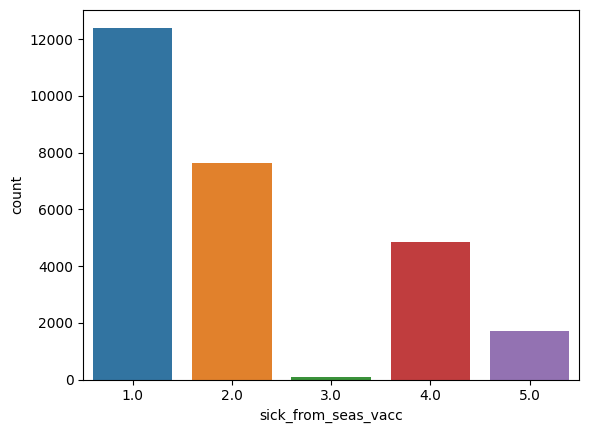

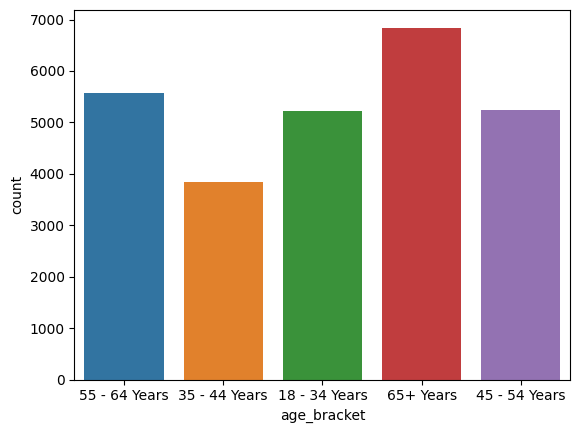

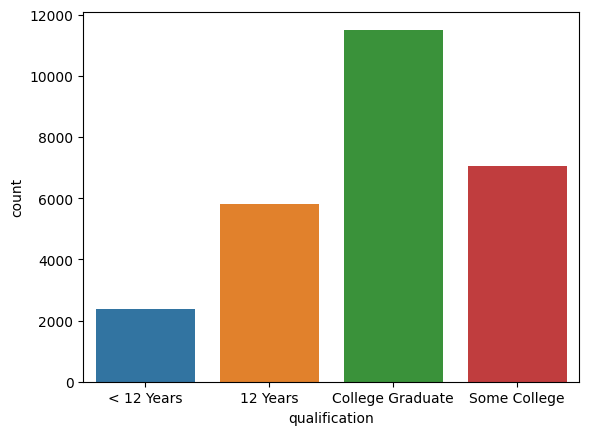

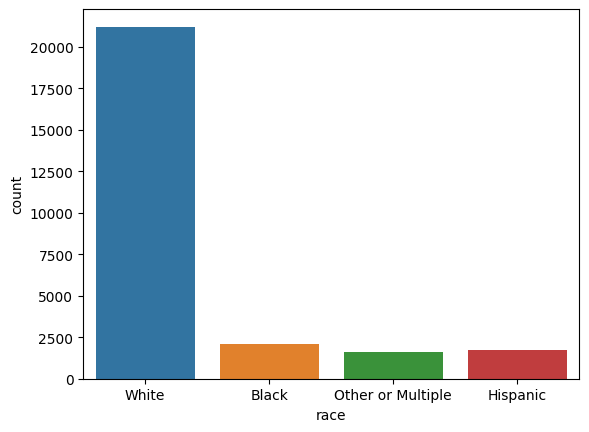

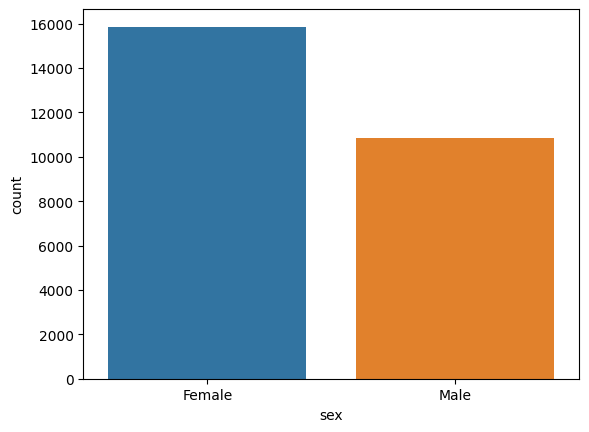

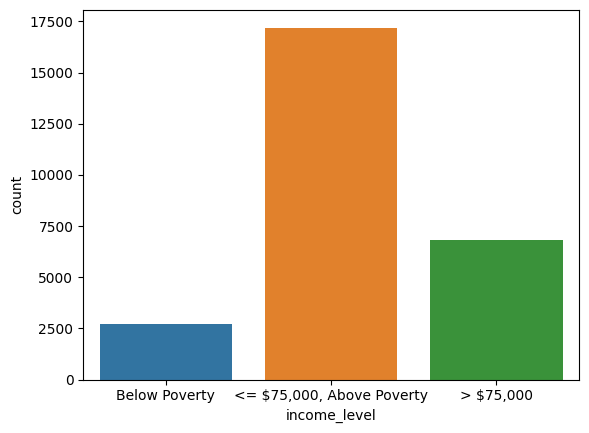

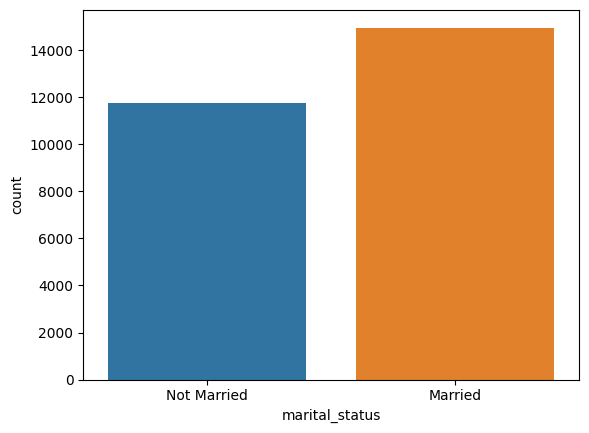

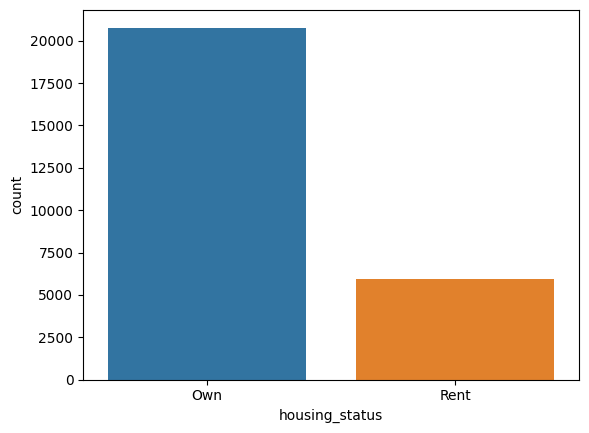

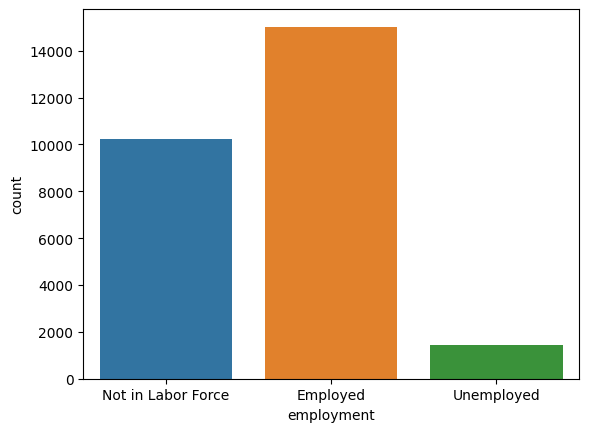

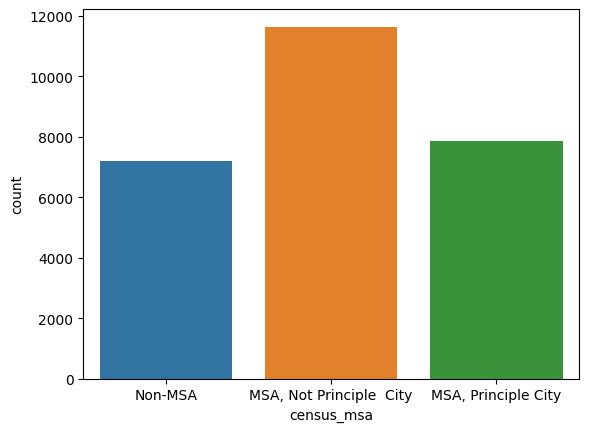

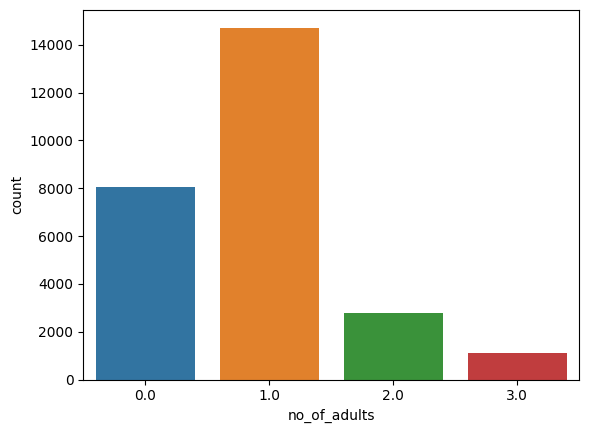

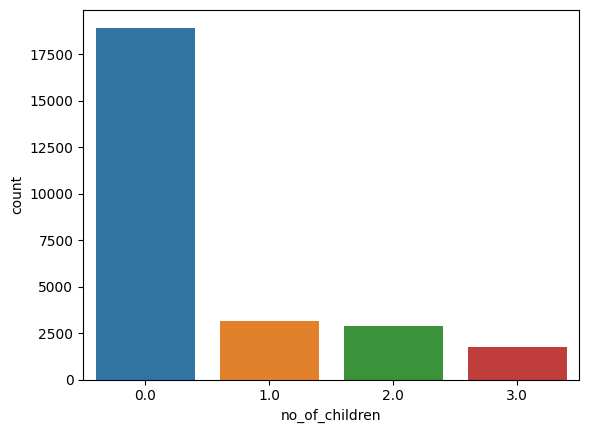

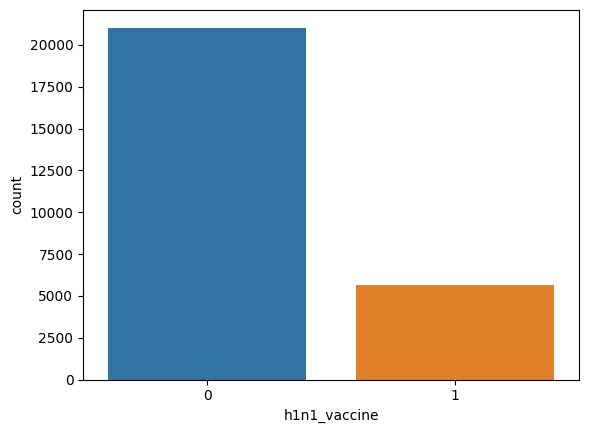

In [15]:
for i in l:
  sns.countplot(x=i,data=vaccine_df)
  plt.show()

In [16]:
parameters = ['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc','h1n1_vaccine']

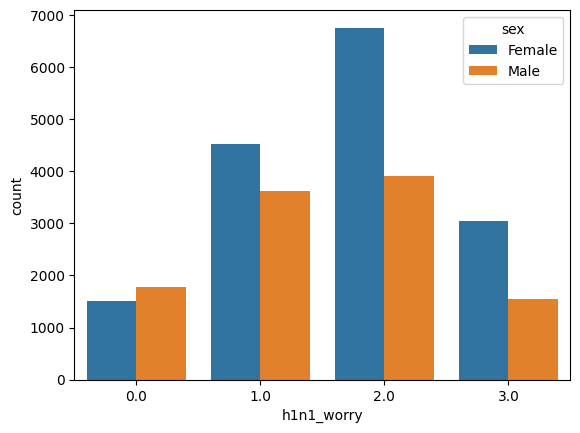

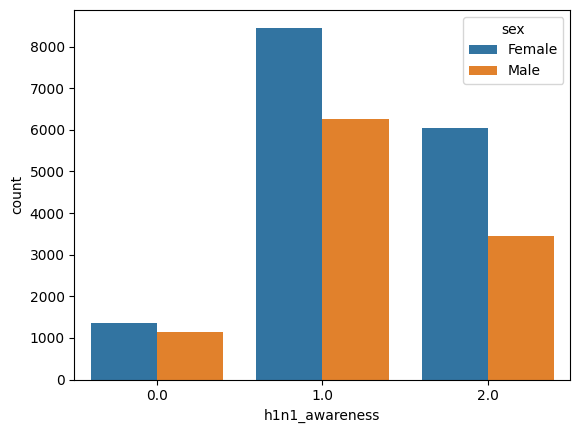

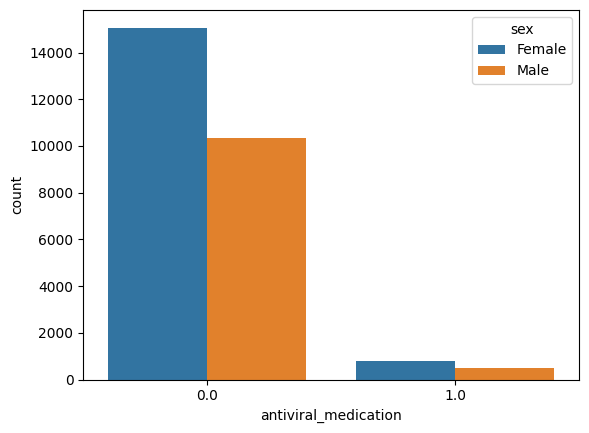

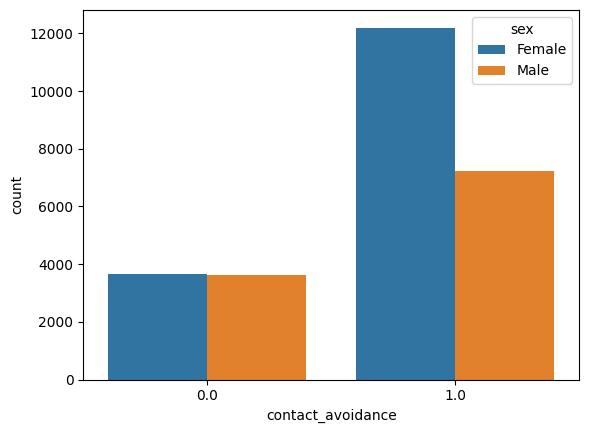

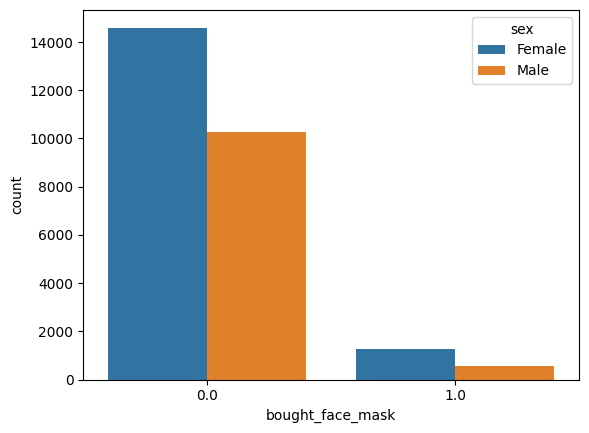

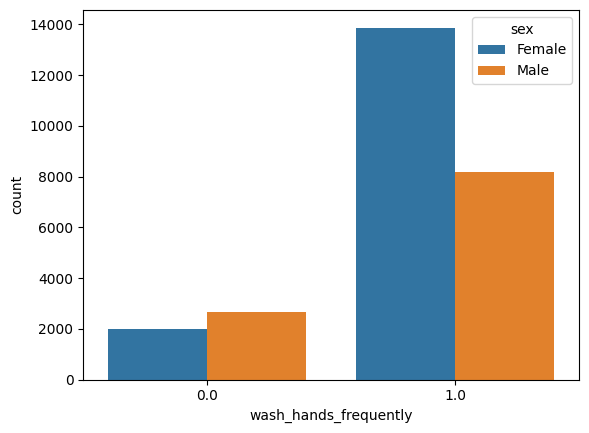

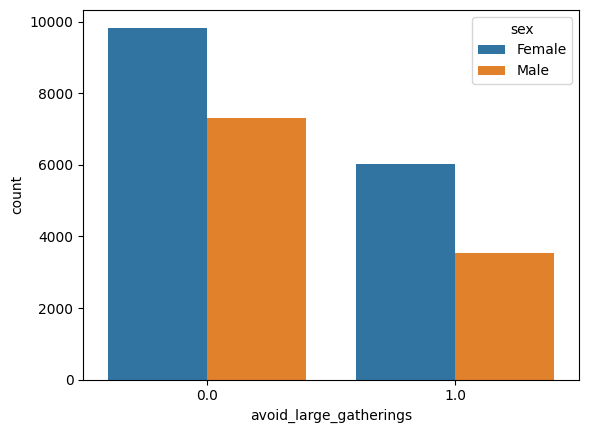

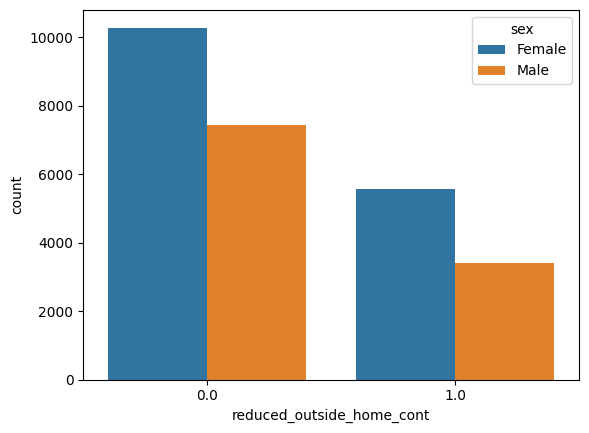

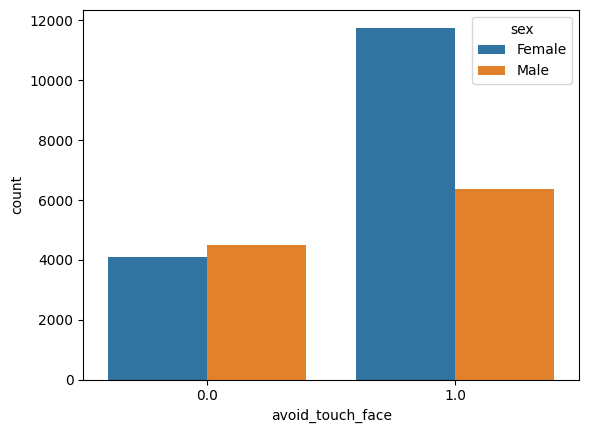

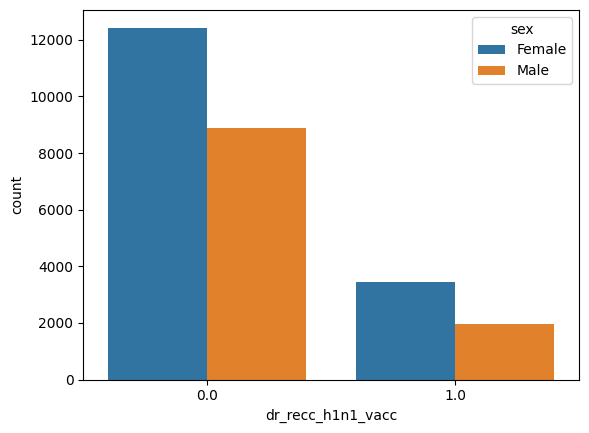

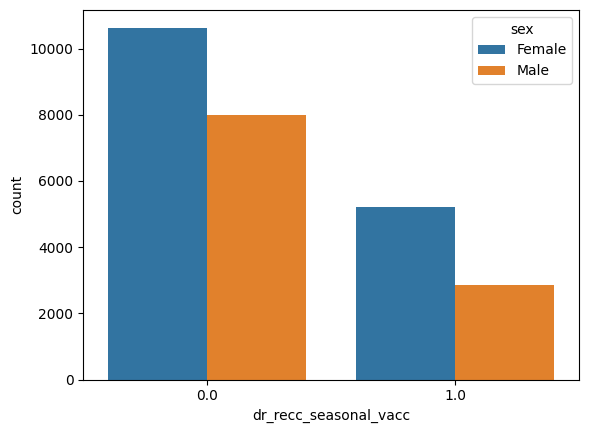

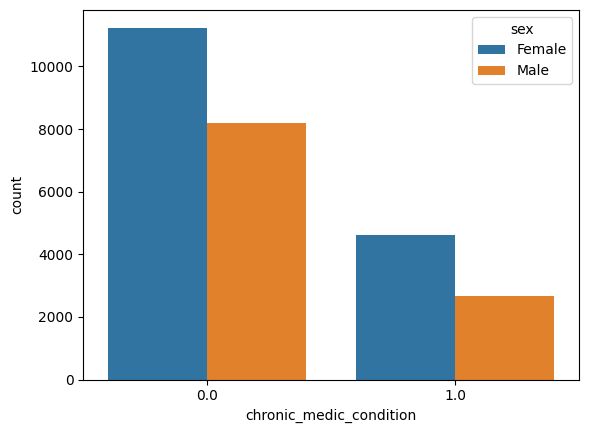

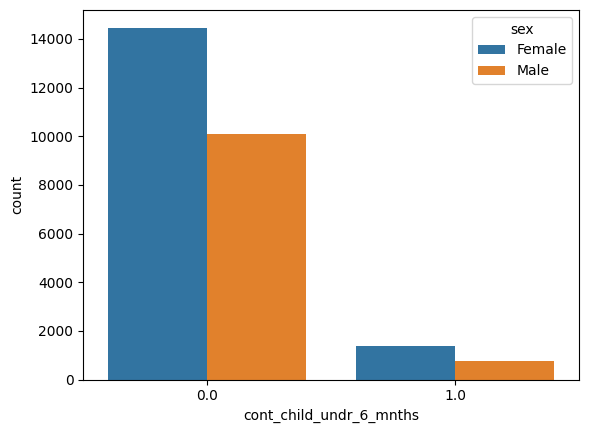

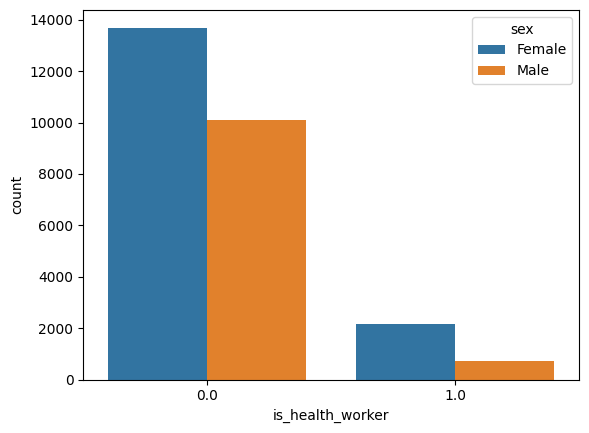

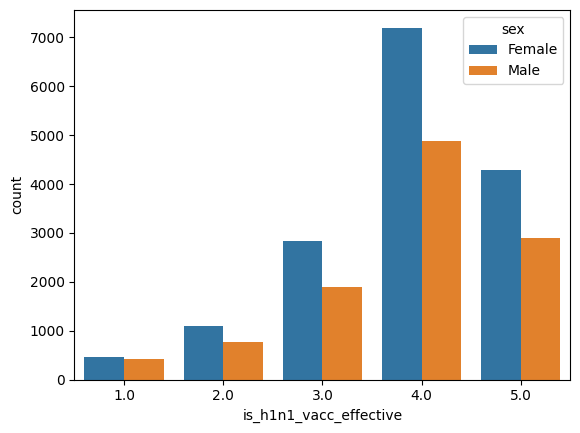

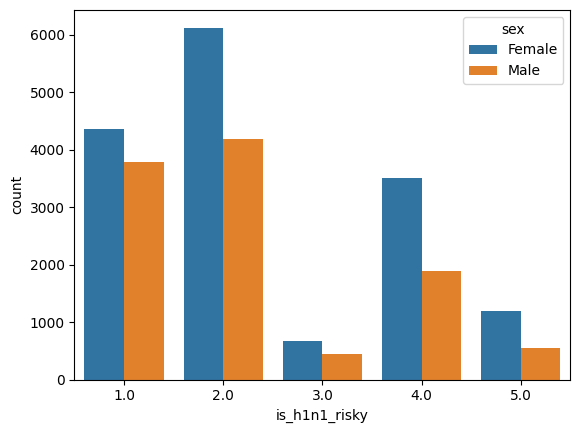

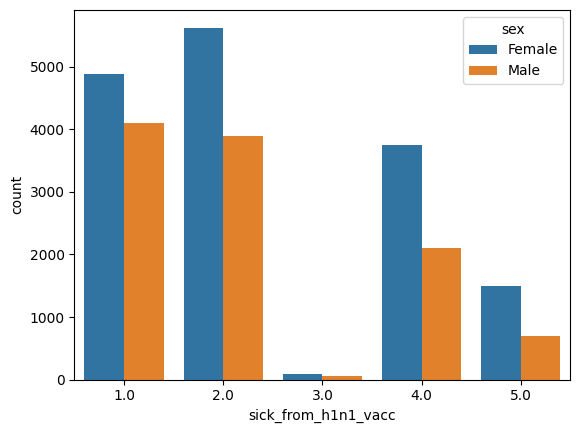

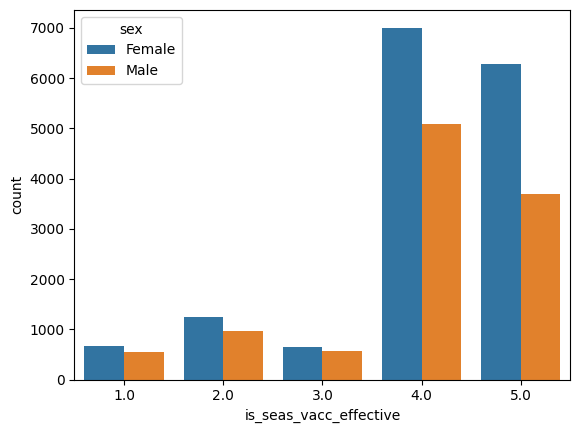

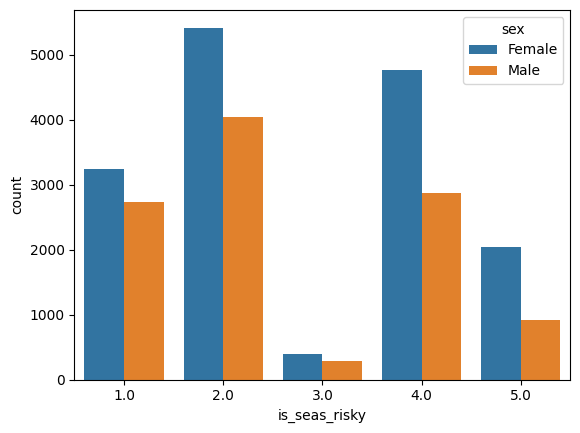

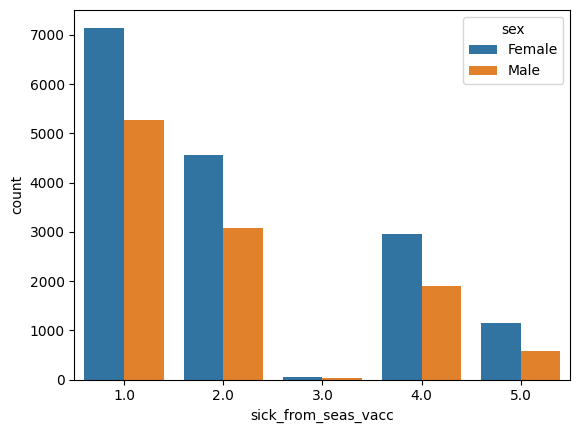

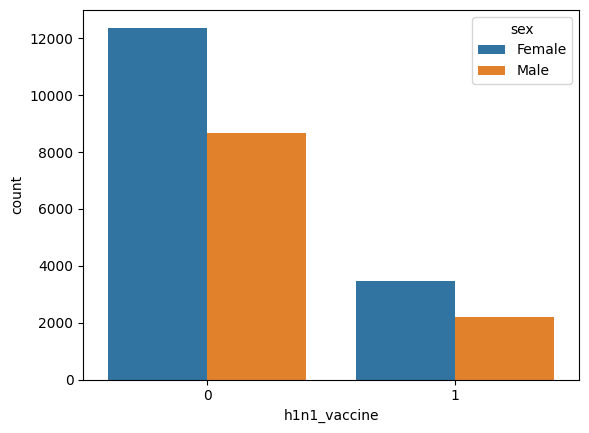

In [17]:
for i in parameters:
  sns.countplot(x=i, hue='sex', data=vaccine_df)
  plt.show()

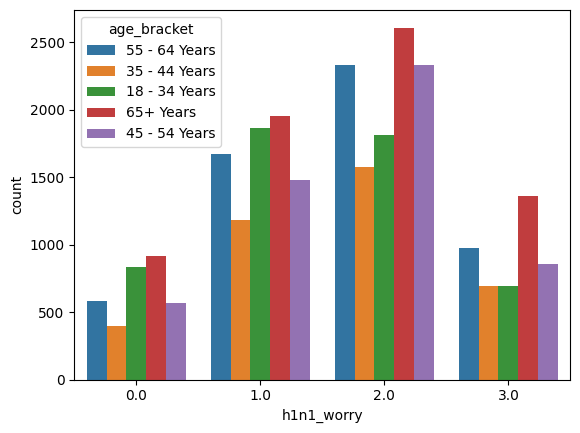

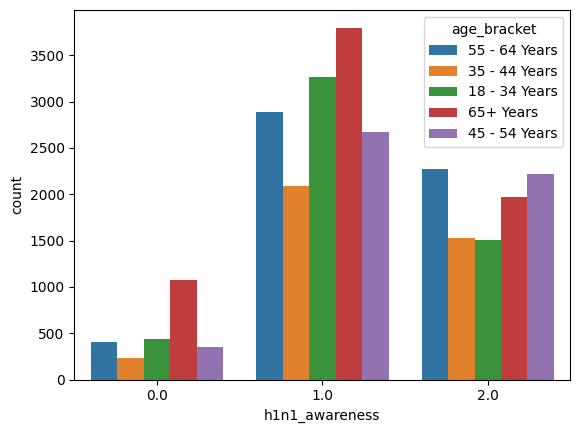

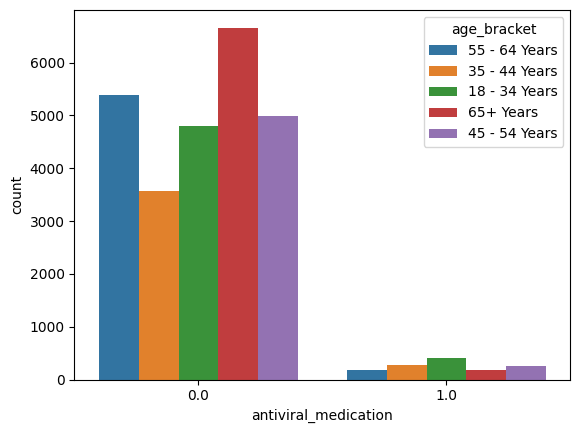

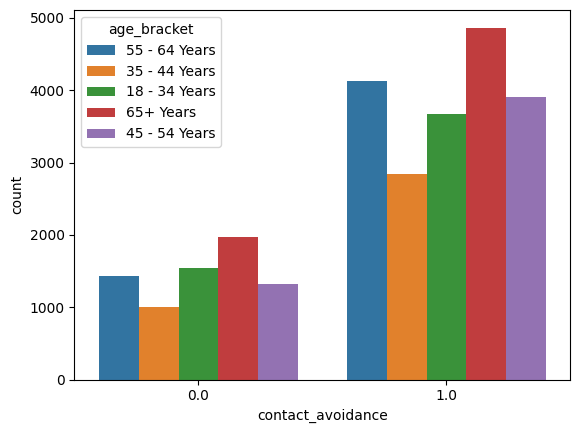

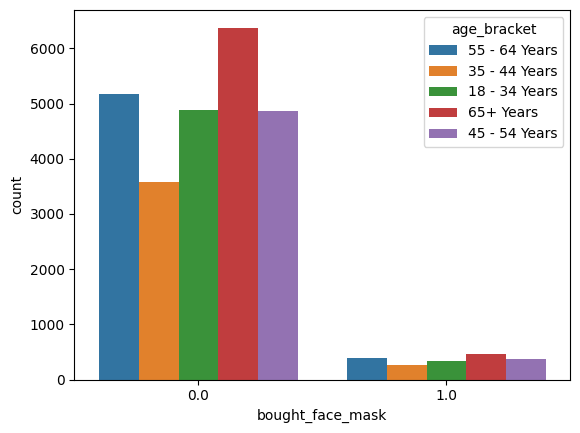

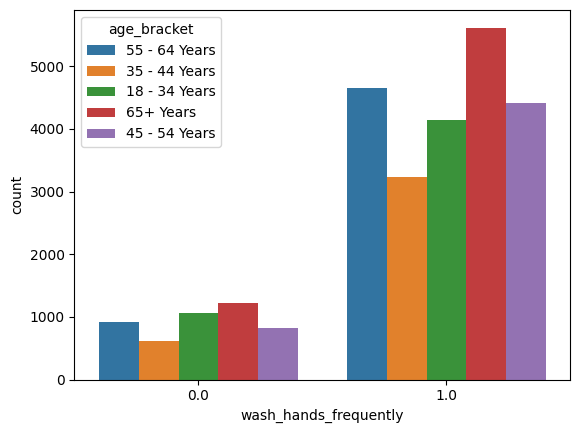

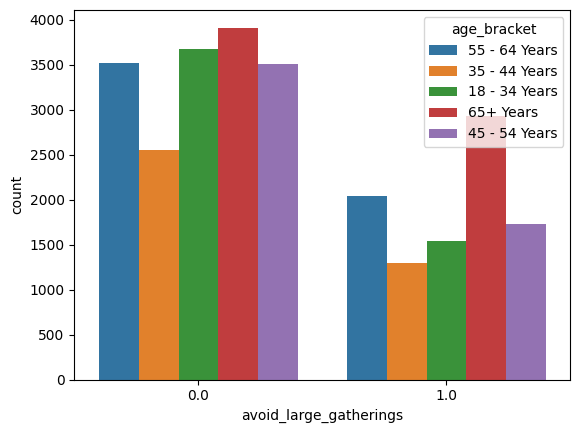

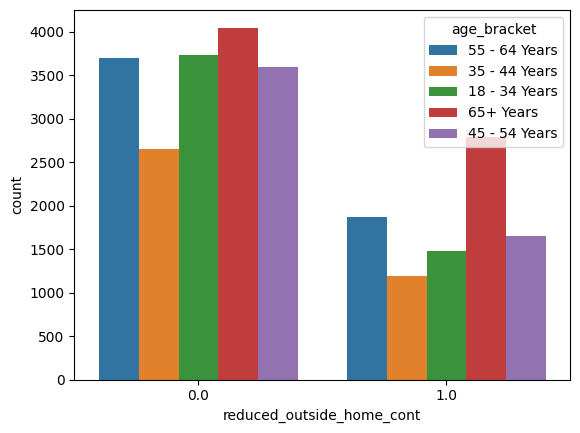

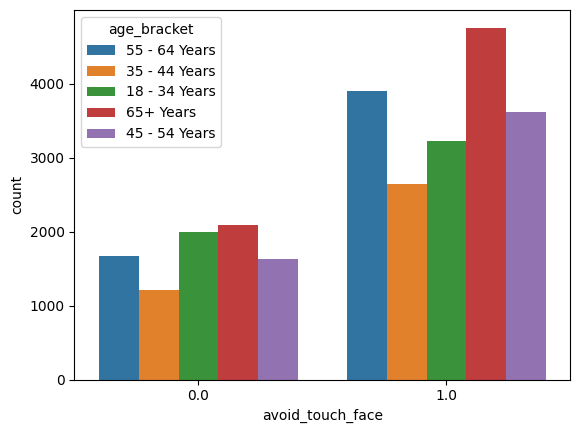

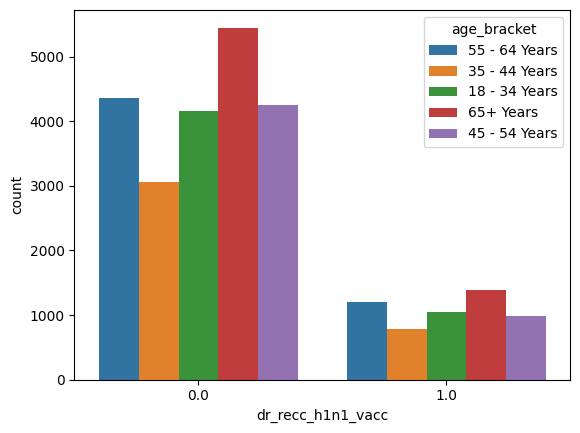

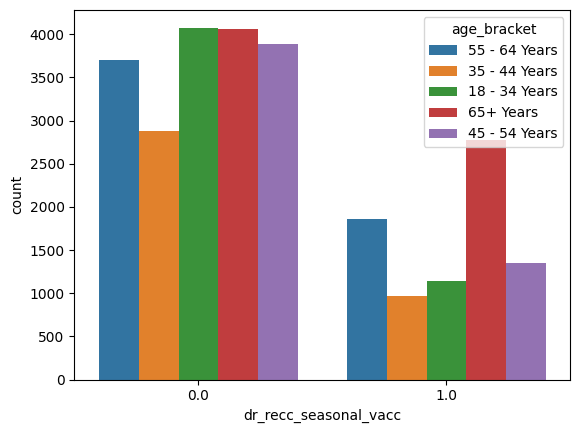

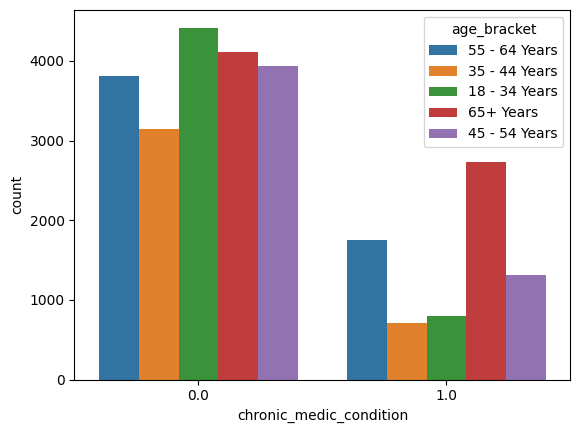

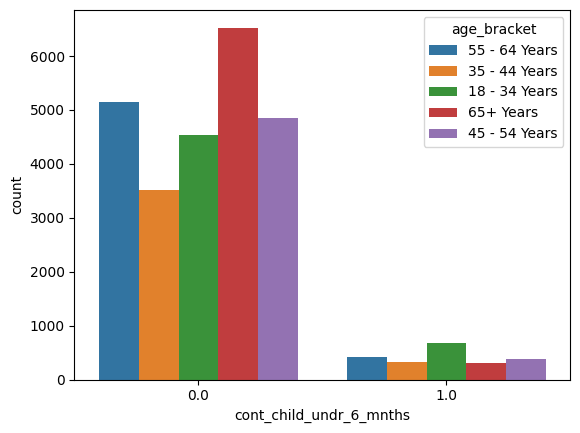

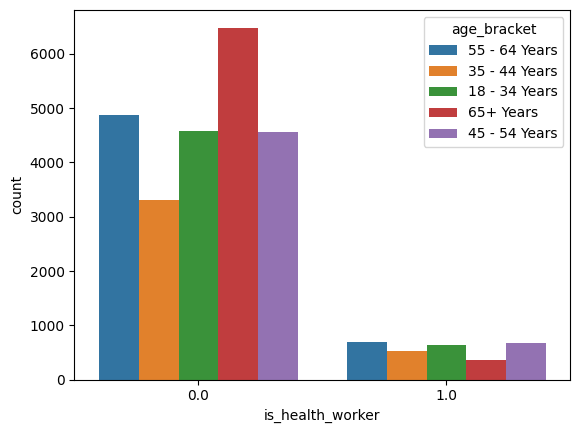

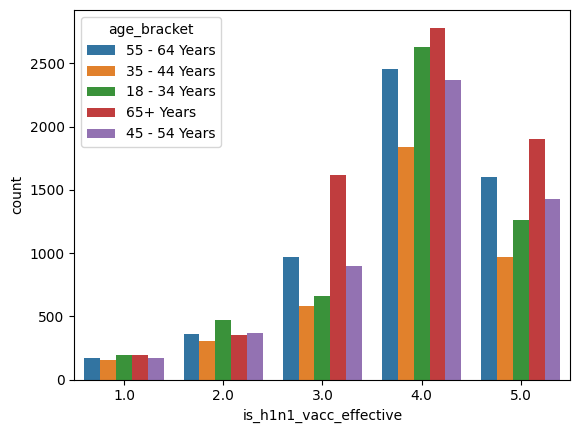

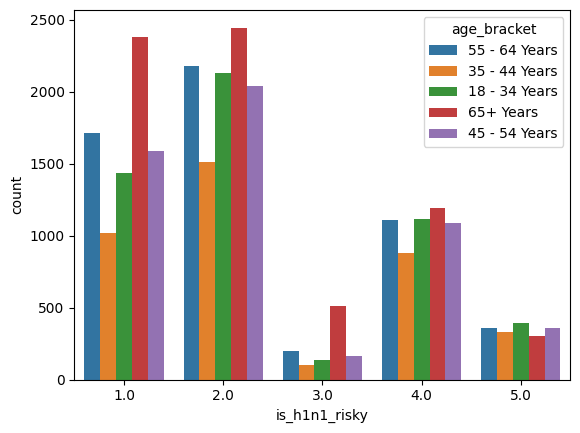

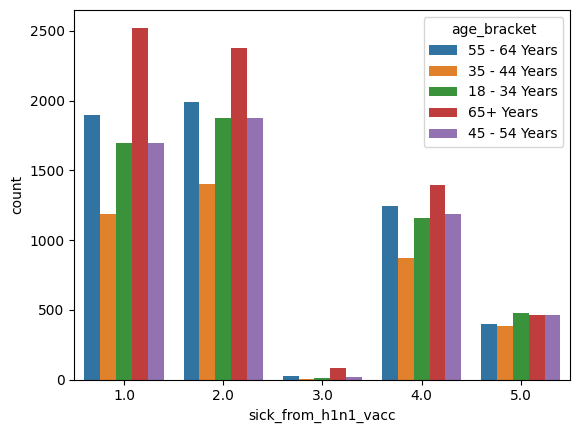

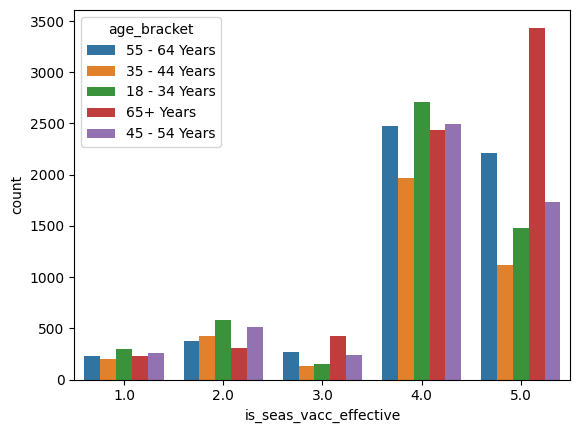

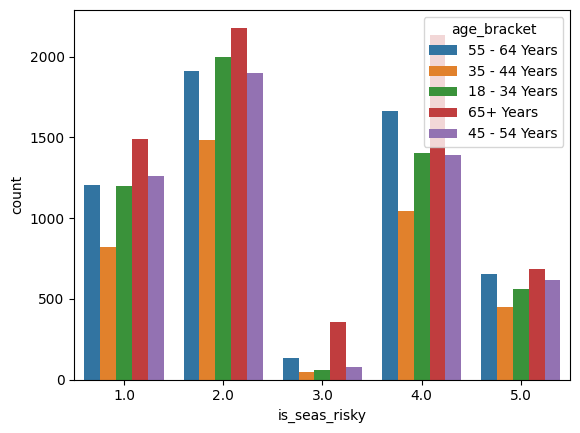

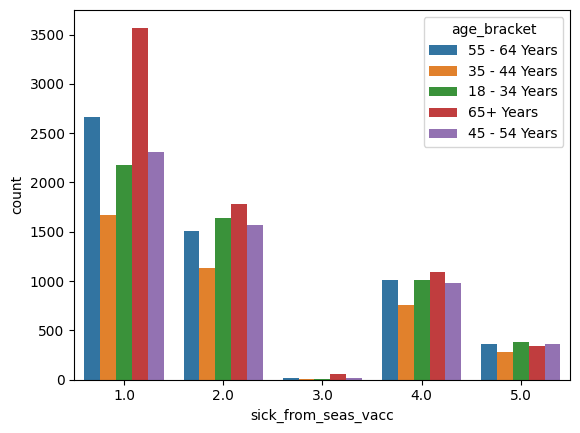

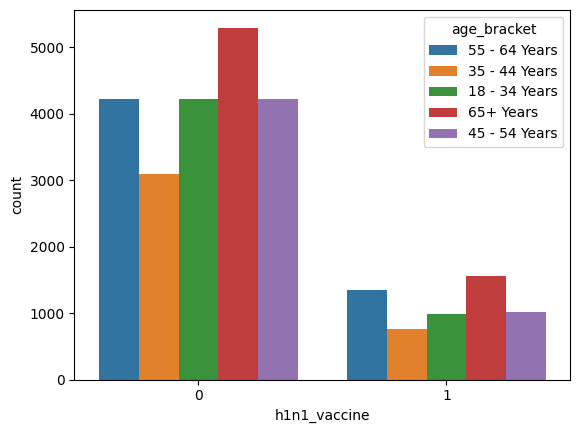

In [18]:
for i in parameters:
  sns.countplot(x=i, hue='age_bracket', data=vaccine_df)
  plt.show()

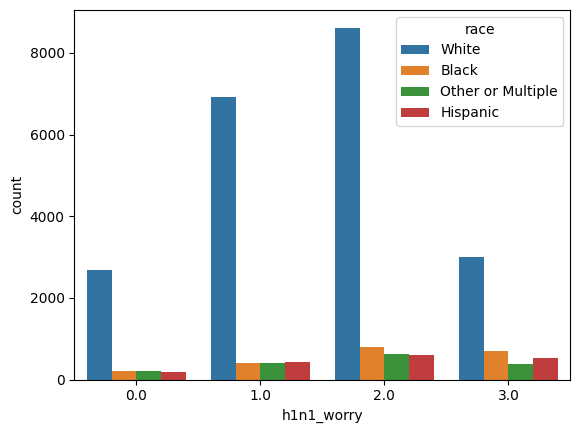

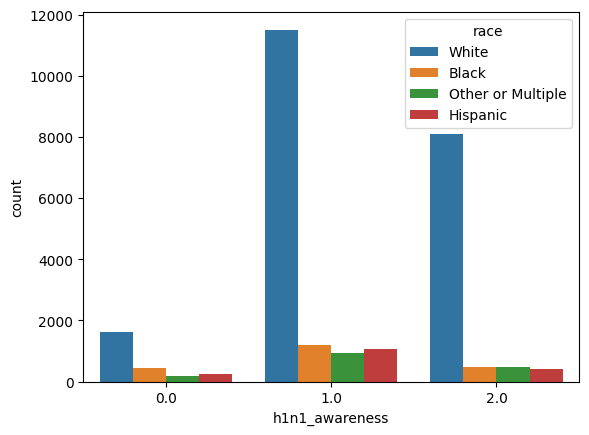

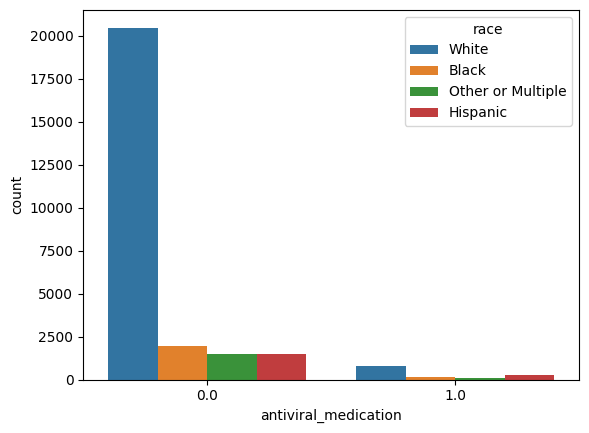

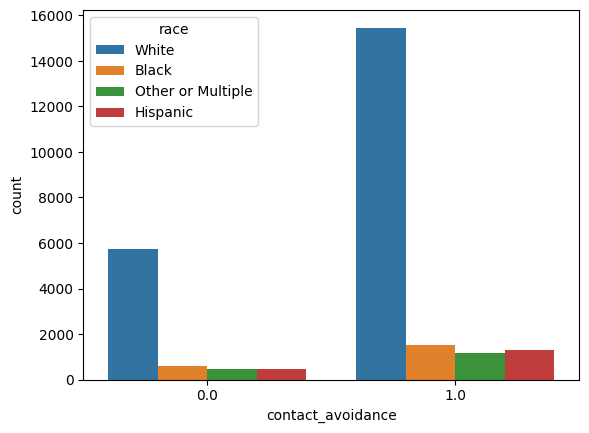

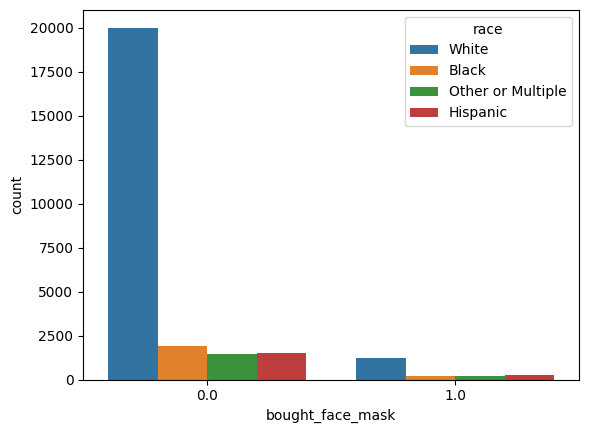

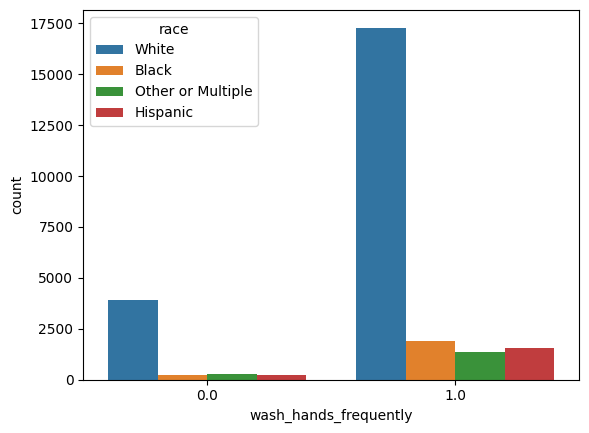

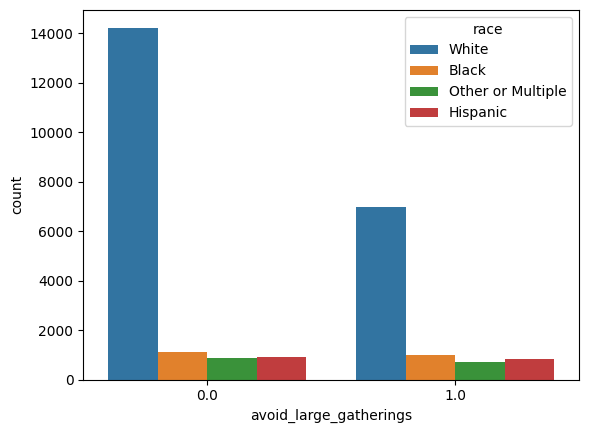

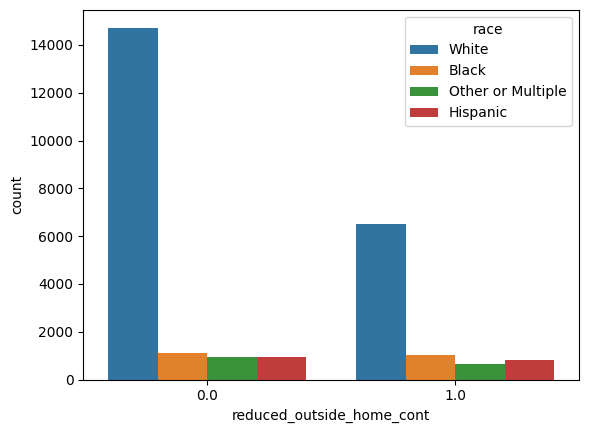

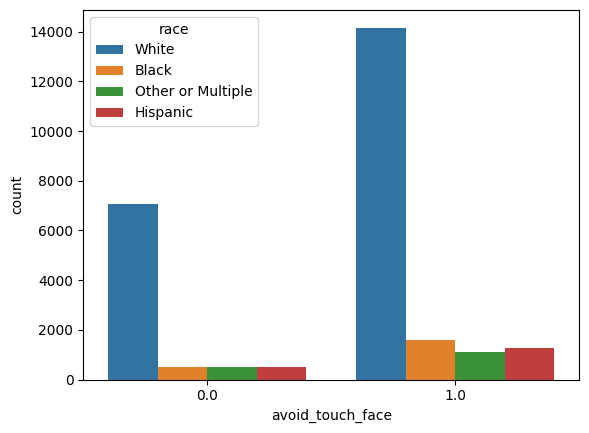

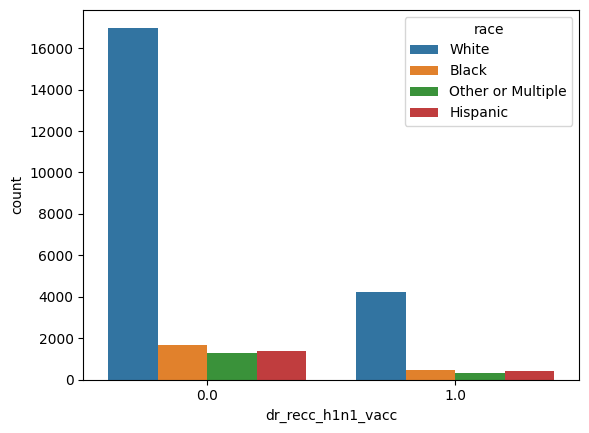

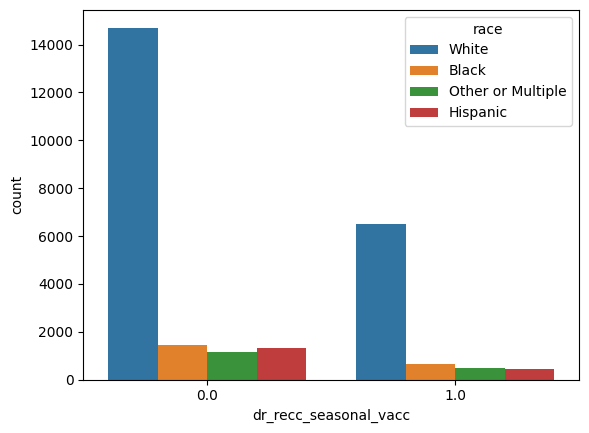

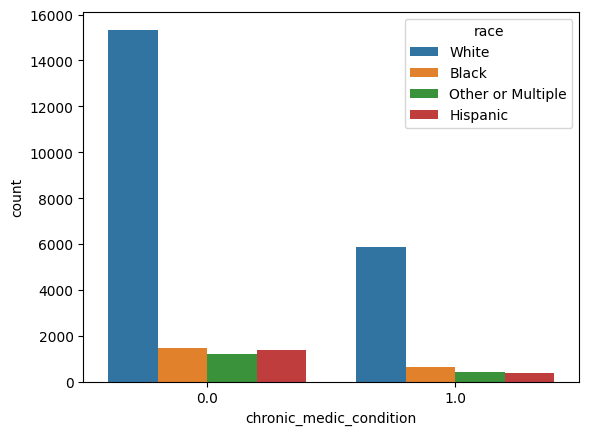

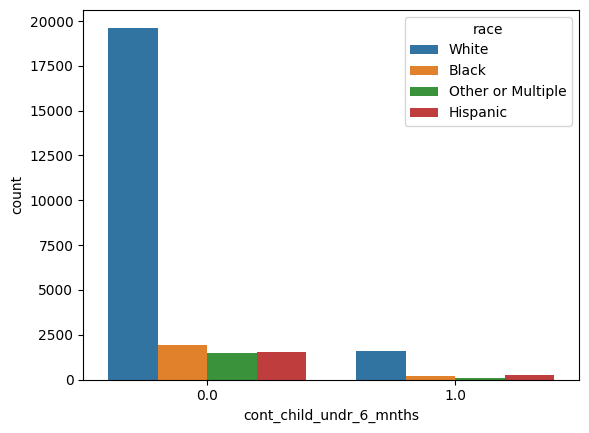

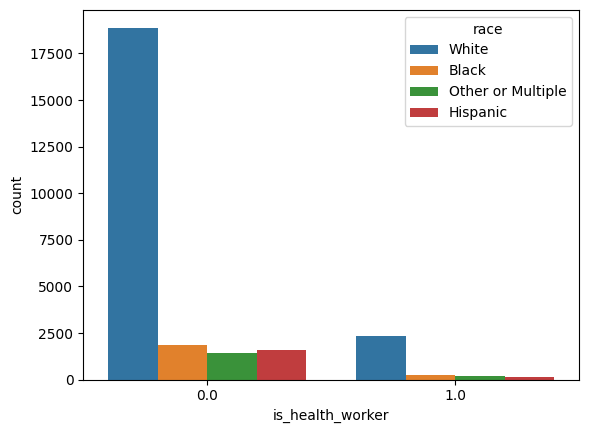

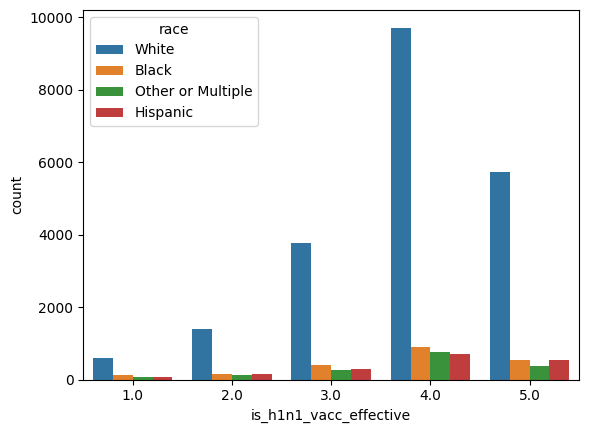

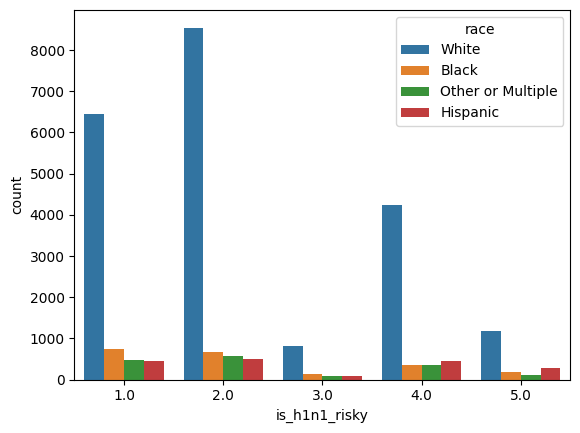

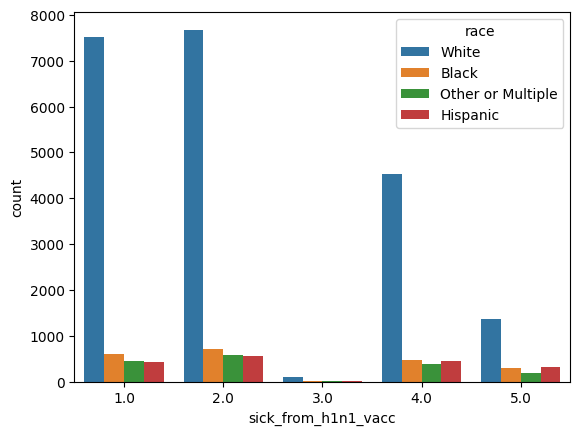

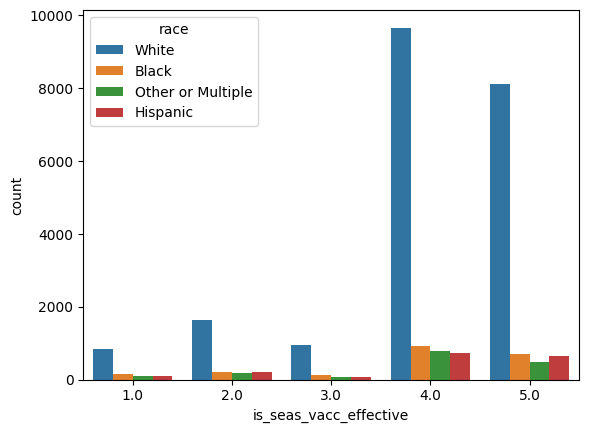

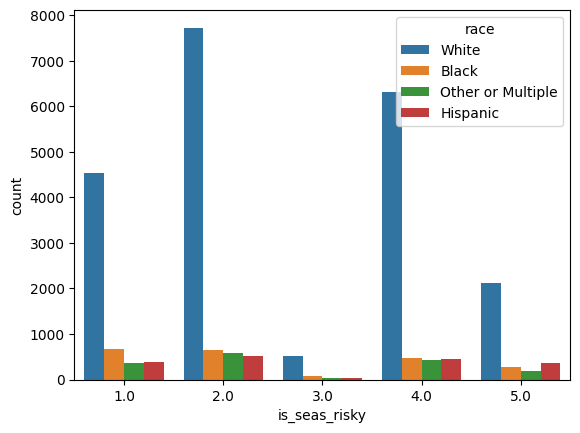

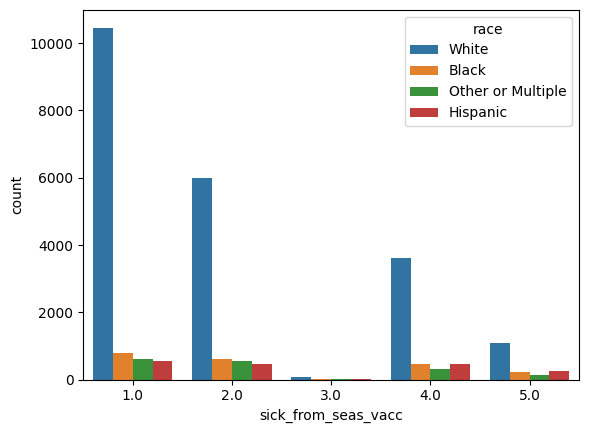

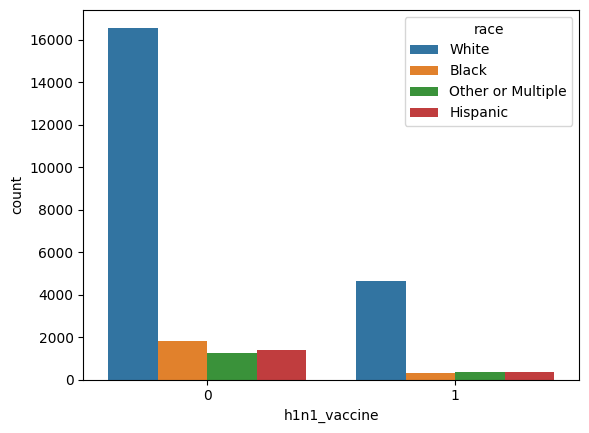

In [19]:
for i in parameters:
  sns.countplot(x=i, hue='race', data=vaccine_df)
  plt.show()

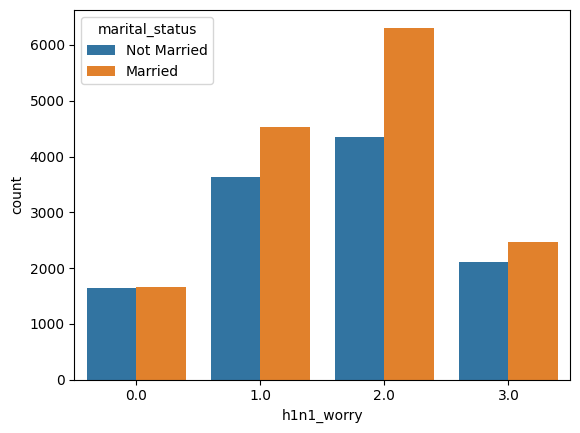

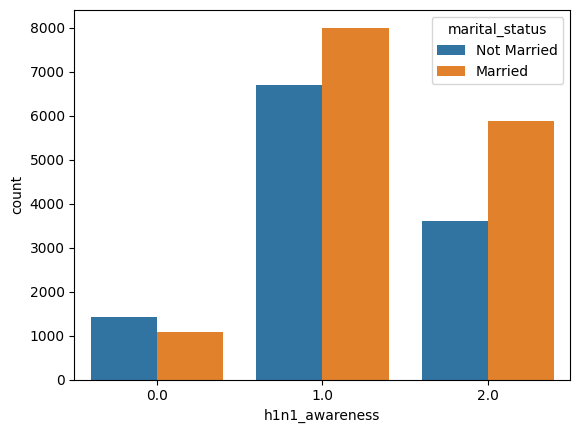

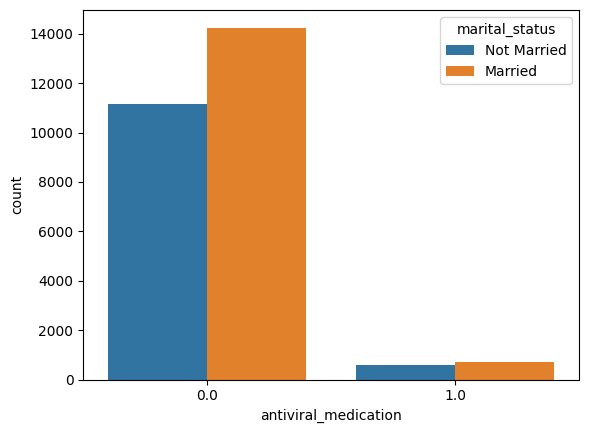

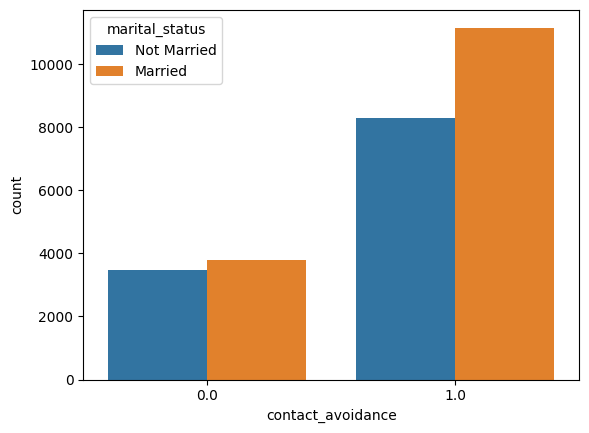

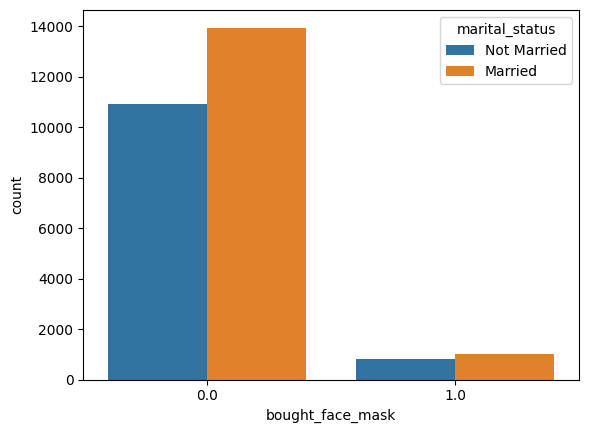

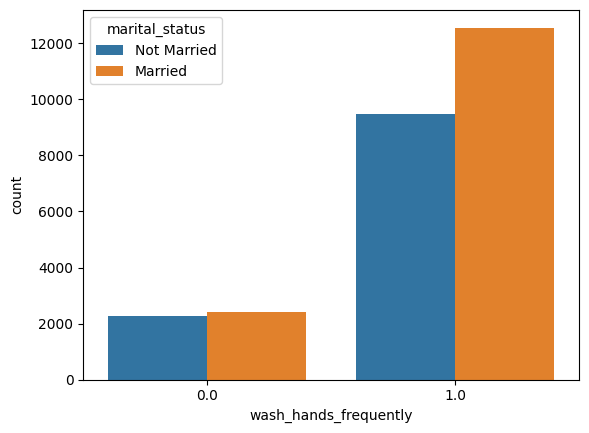

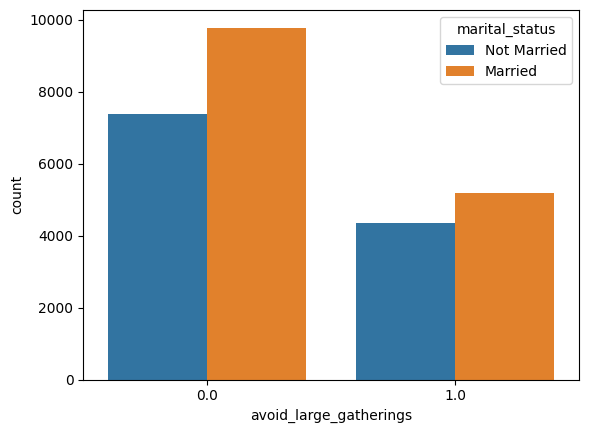

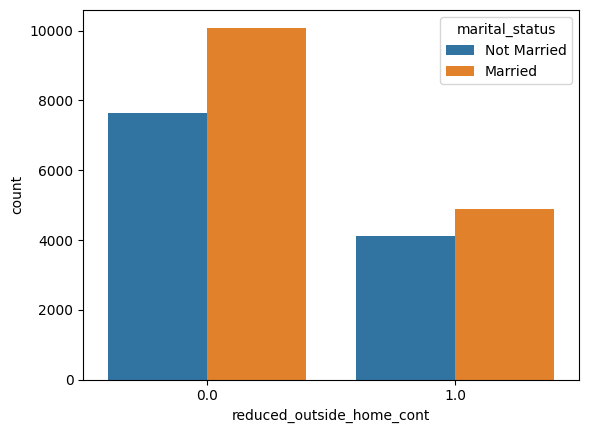

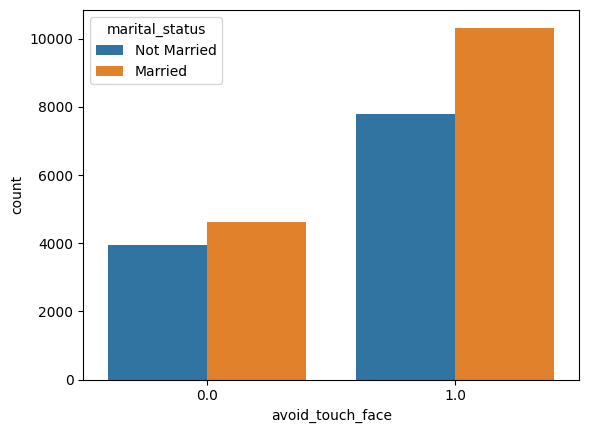

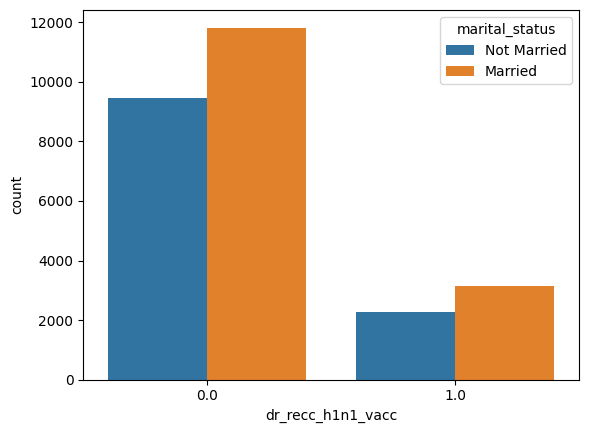

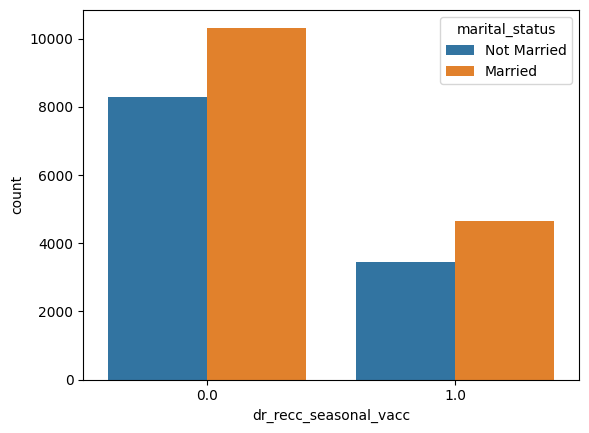

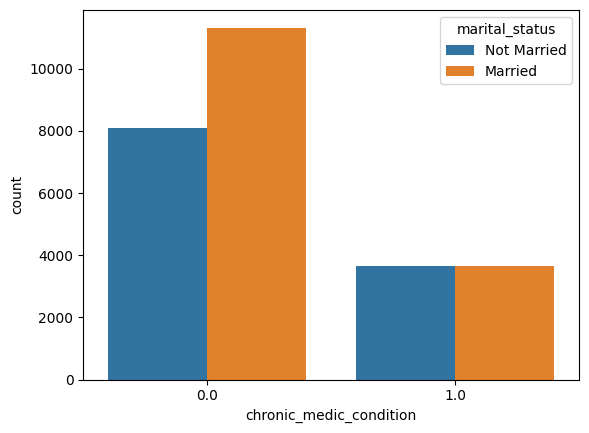

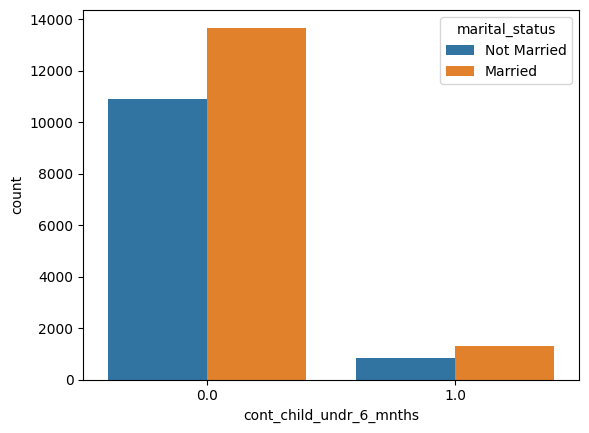

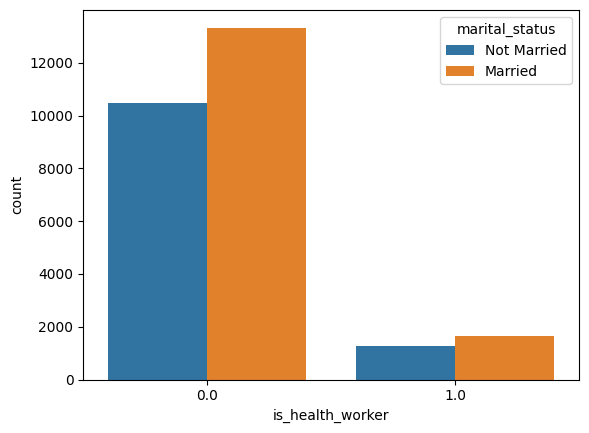

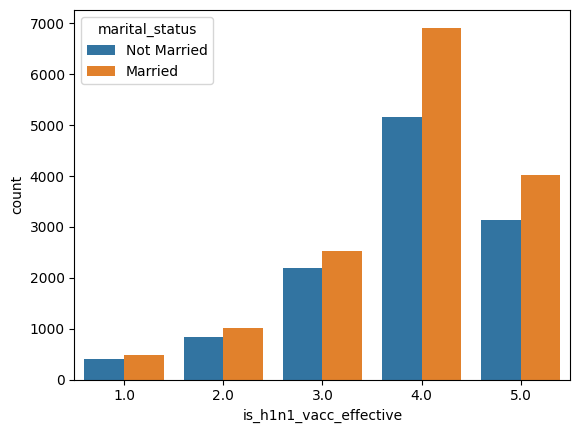

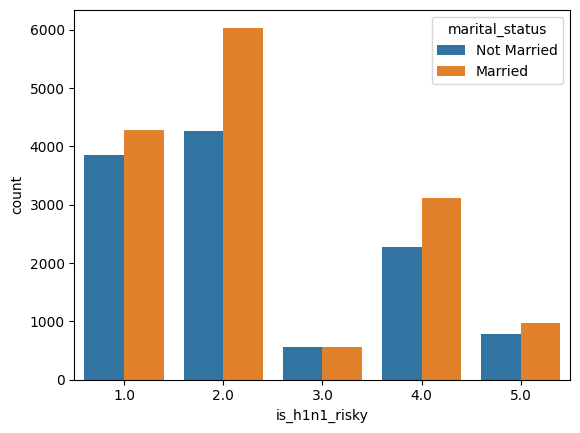

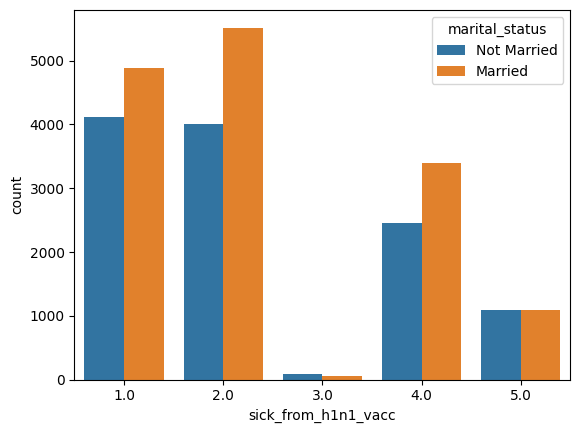

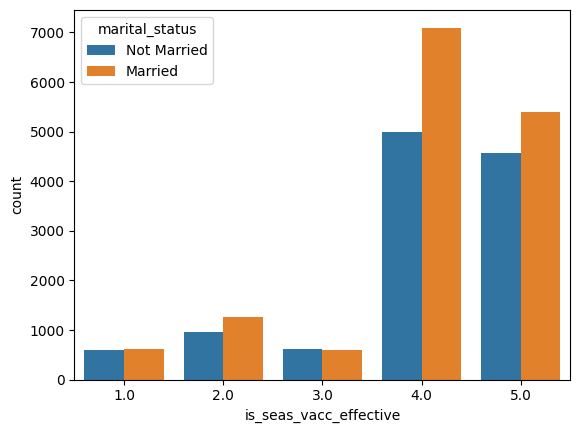

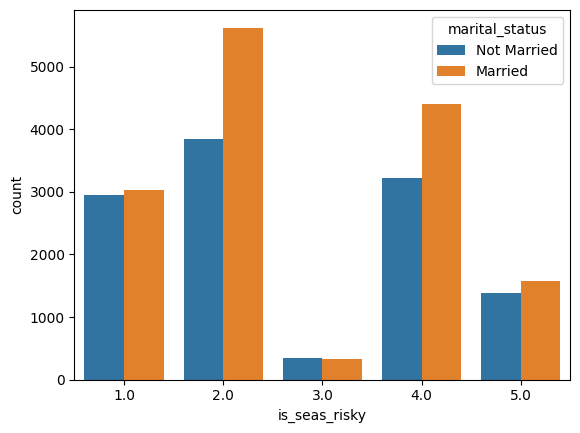

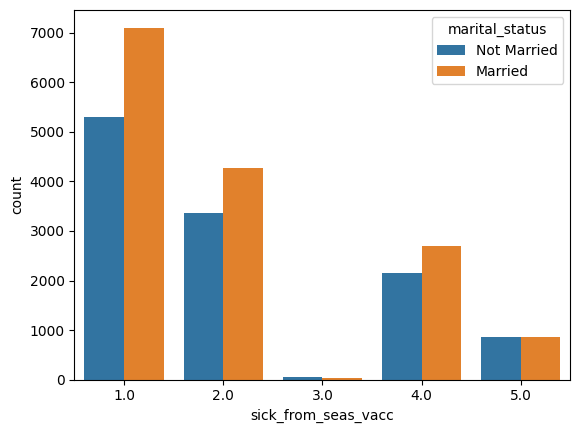

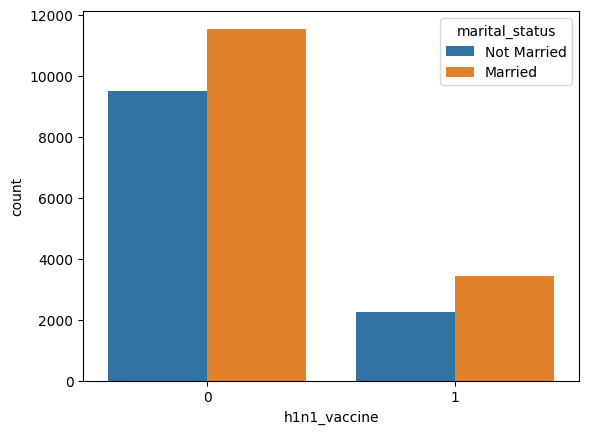

In [20]:
for i in parameters:
  sns.countplot(x=i, hue='marital_status', data=vaccine_df)
  plt.show()

In [21]:
y=['qualification','income_level','housing_status','employment','census_msa','no_of_adults','no_of_children']

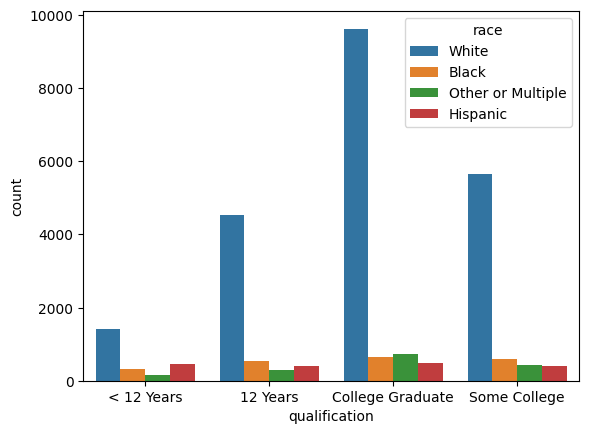

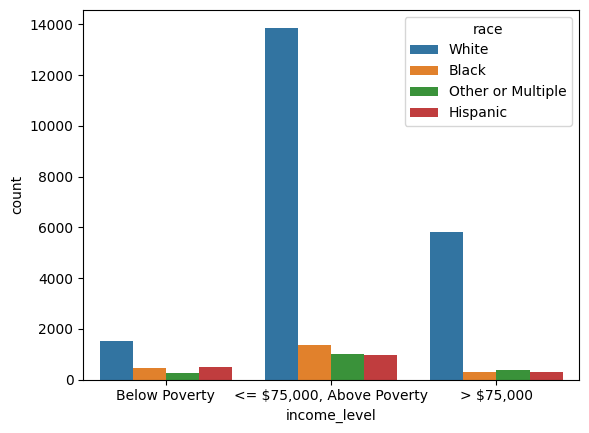

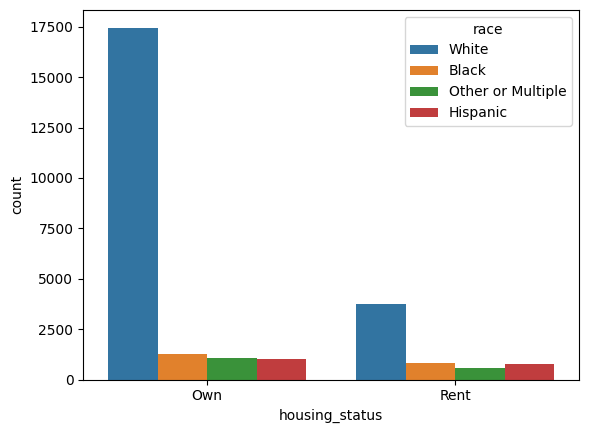

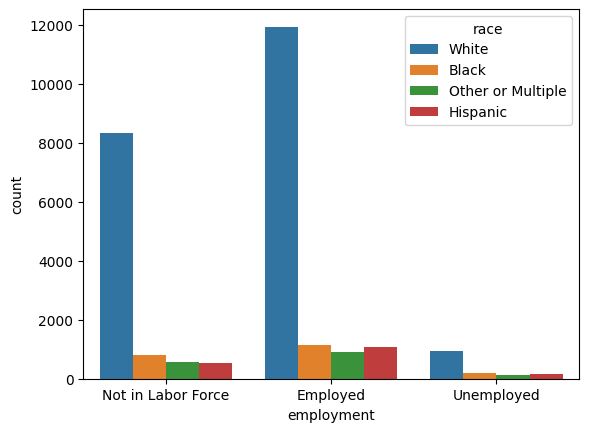

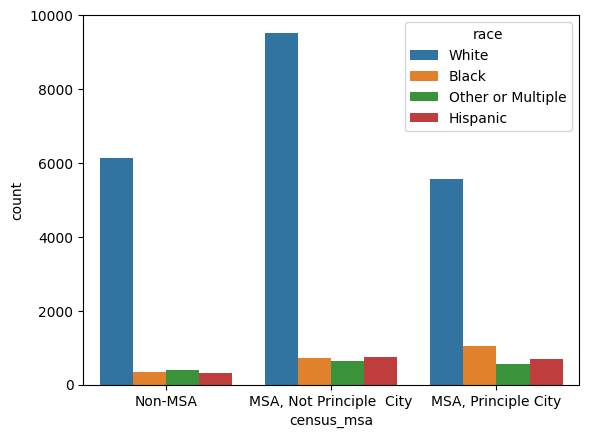

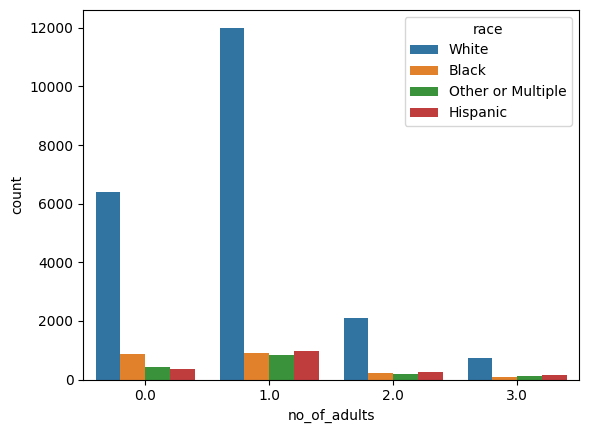

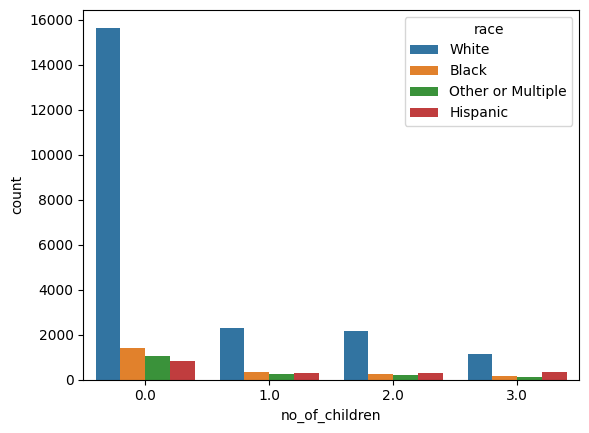

In [22]:
for i in y:
  sns.countplot(x=i, hue='race', data=vaccine_df)
  plt.show()

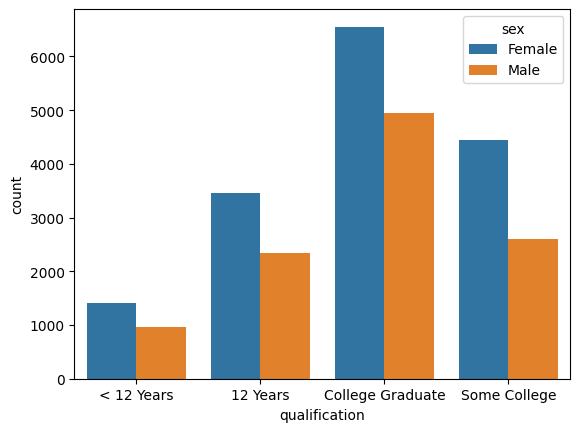

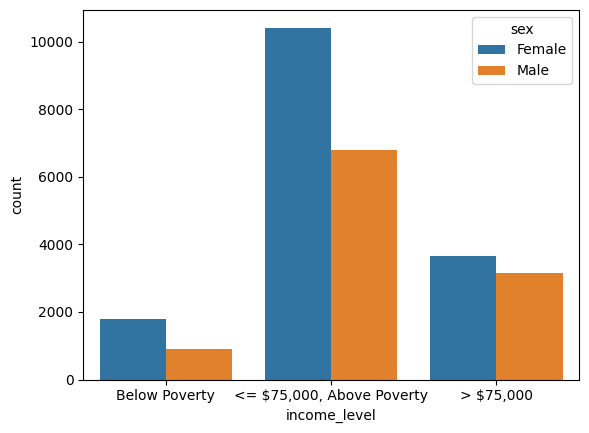

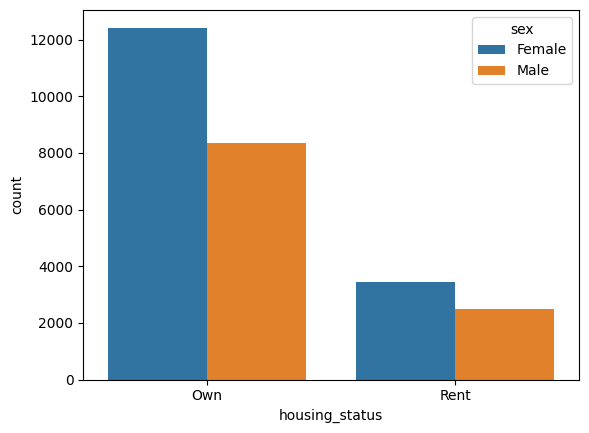

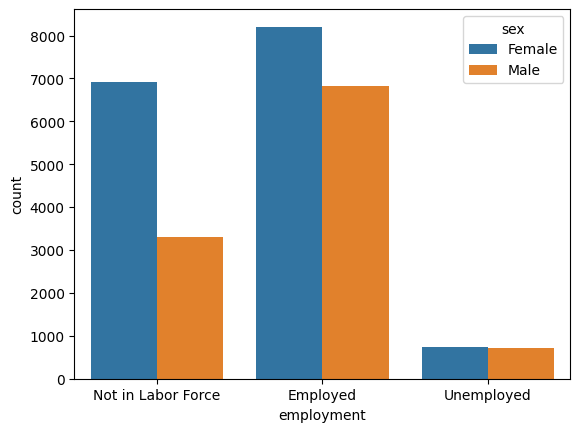

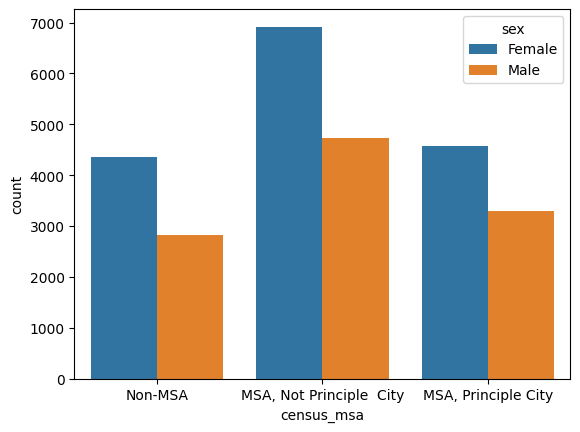

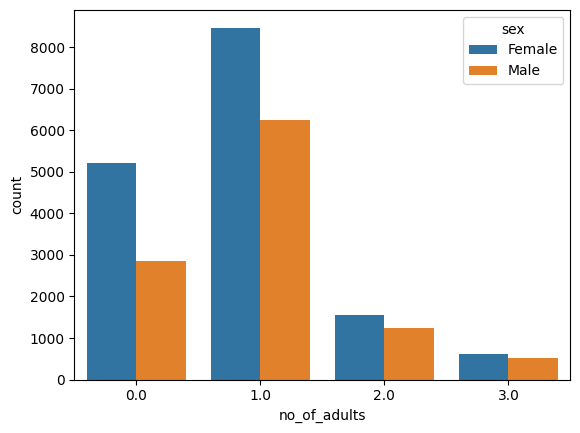

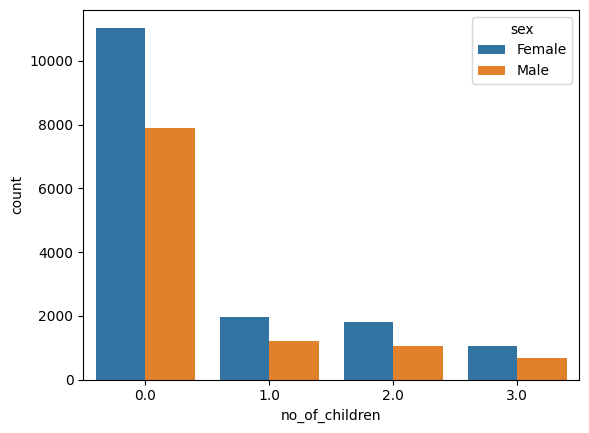

In [23]:
for i in y:
  sns.countplot(x=i, hue='sex', data=vaccine_df)
  plt.show()

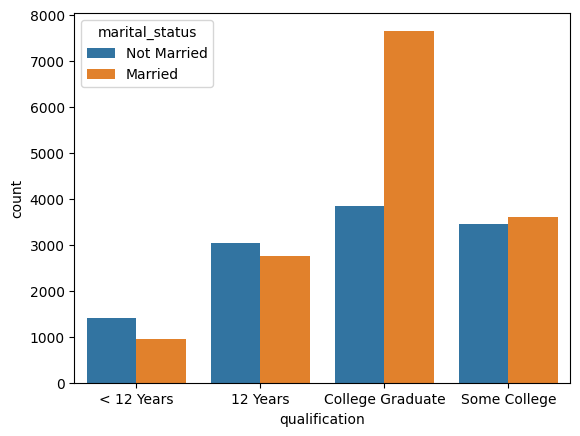

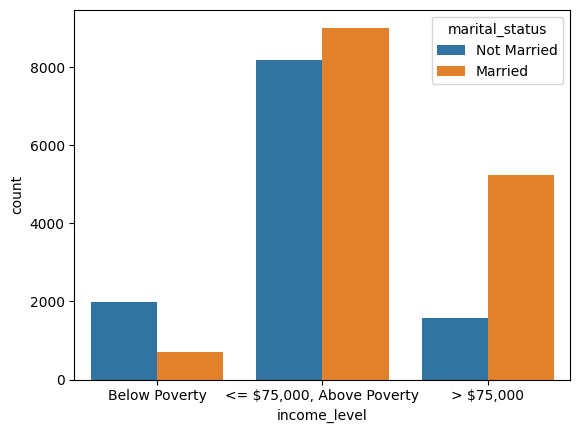

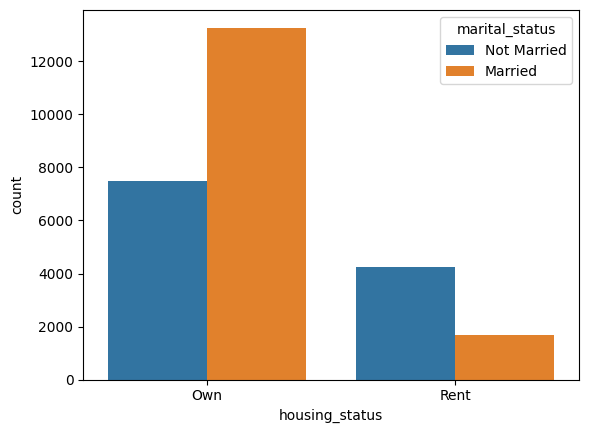

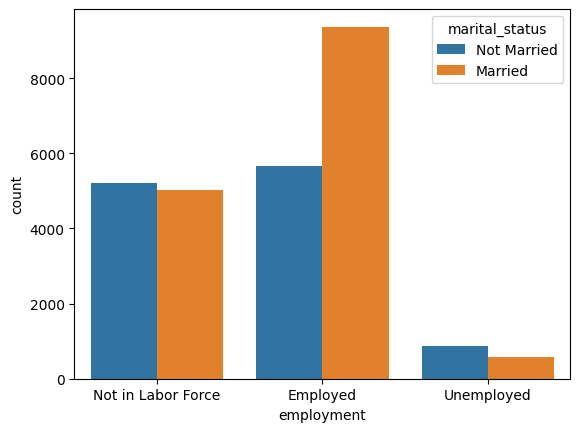

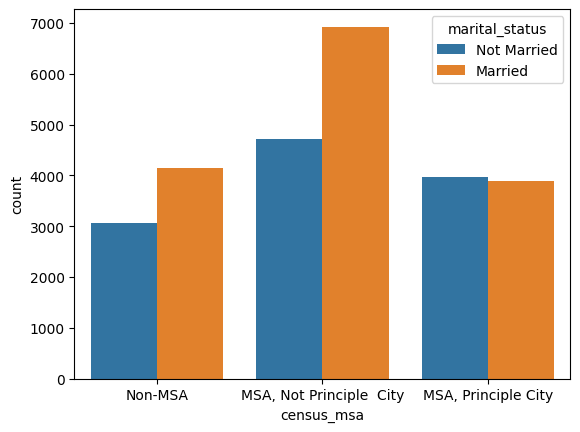

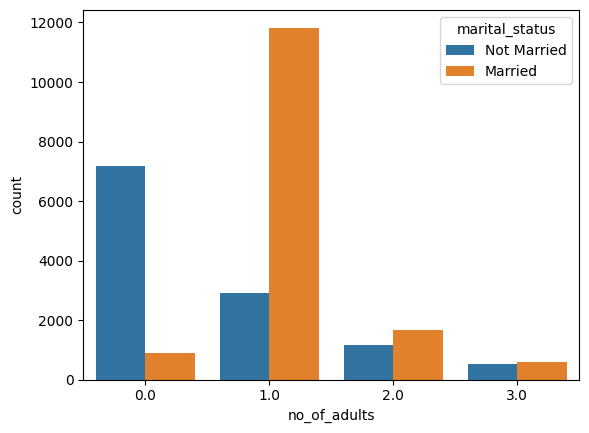

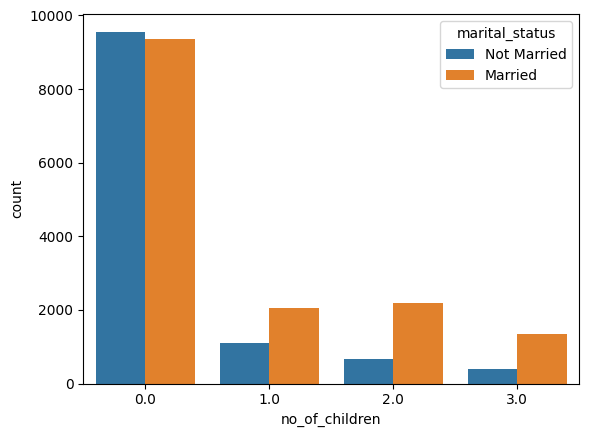

In [24]:
for i in y:
  sns.countplot(x=i, hue='marital_status', data=vaccine_df)
  plt.show()

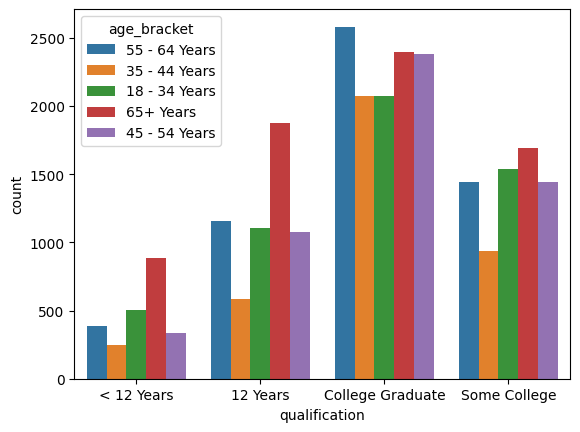

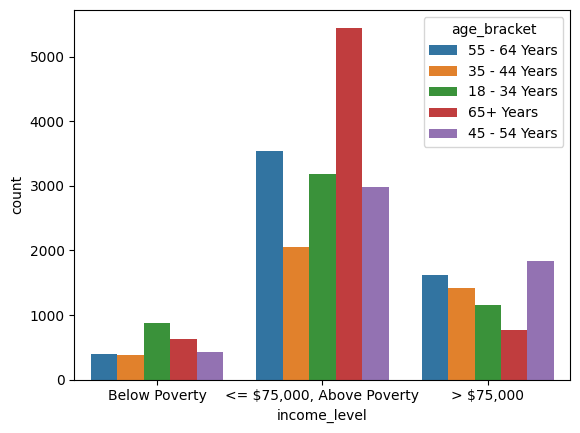

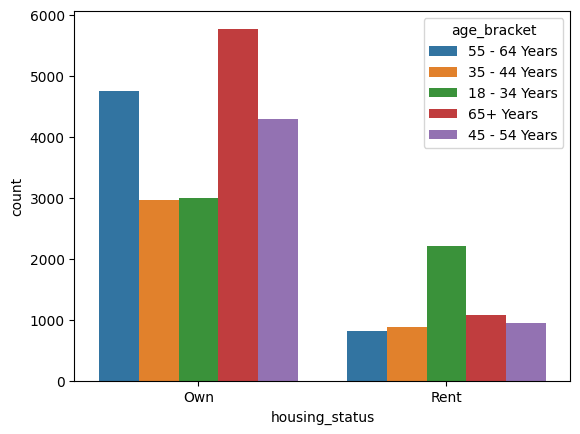

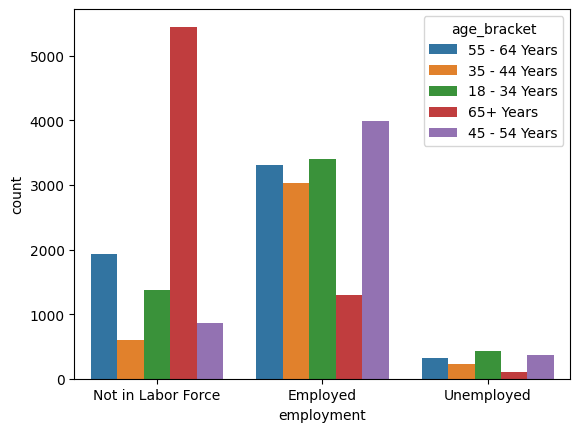

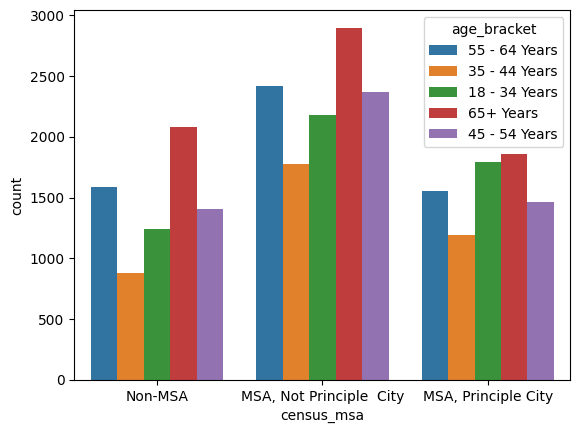

In [25]:
for i in ['qualification','income_level','housing_status','employment','census_msa']:
  sns.countplot(x=i, hue='age_bracket', data=vaccine_df)
  plt.show()

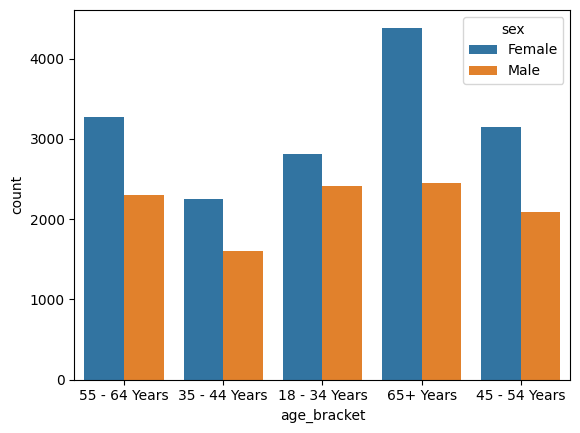

In [26]:
sns.countplot(x='age_bracket',hue='sex',data=vaccine_df)
plt.show()

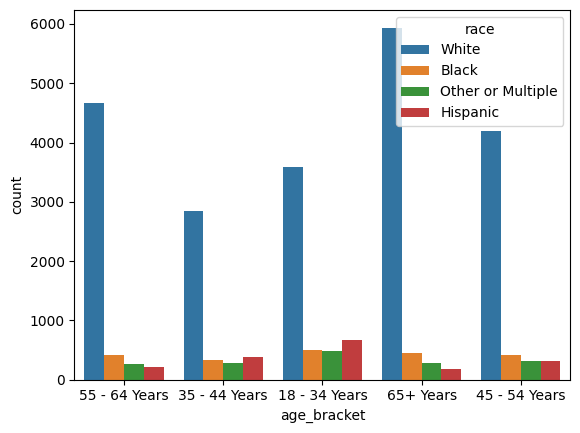

In [27]:
sns.countplot(x='age_bracket',hue='race',data=vaccine_df)
plt.show()

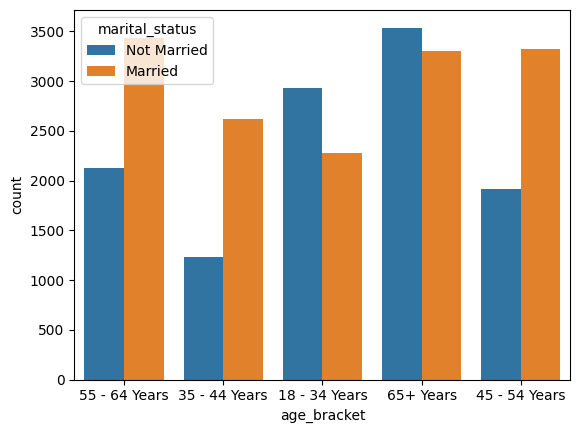

In [28]:
sns.countplot(x='age_bracket',hue='marital_status',data=vaccine_df)
plt.show()

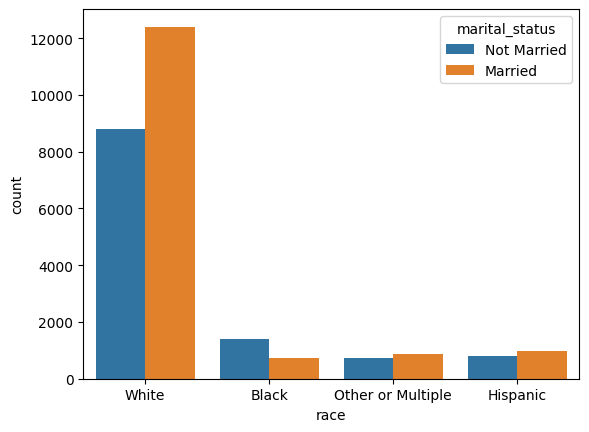

In [29]:
sns.countplot(x='race',hue='marital_status',data=vaccine_df)
plt.show()

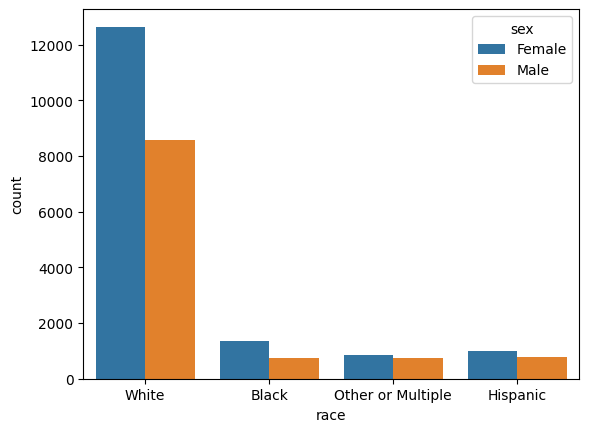

In [30]:
sns.countplot(x='race',hue='sex',data=vaccine_df)
plt.show()

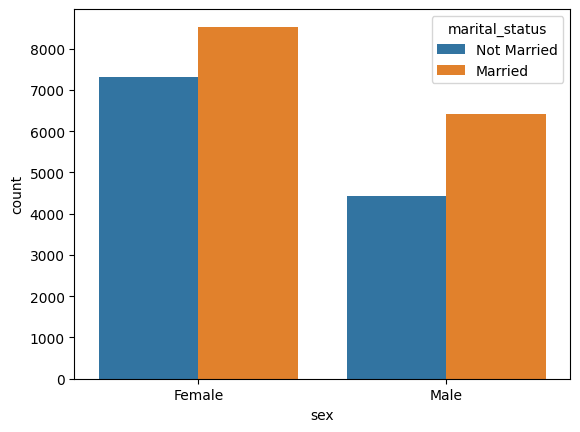

In [31]:
sns.countplot(x='sex',hue='marital_status',data=vaccine_df)
plt.show()

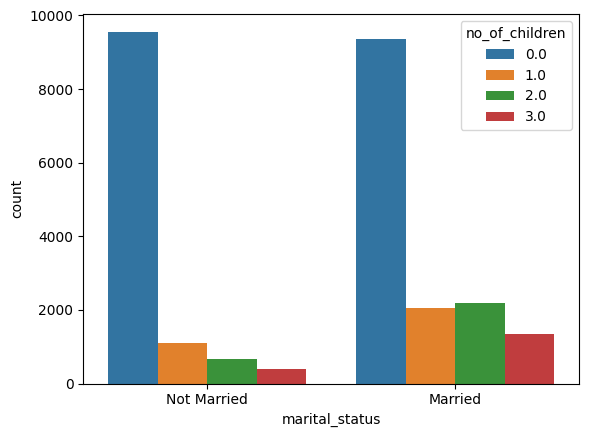

In [32]:
sns.countplot(x='marital_status',hue='no_of_children',data=vaccine_df)
plt.show()

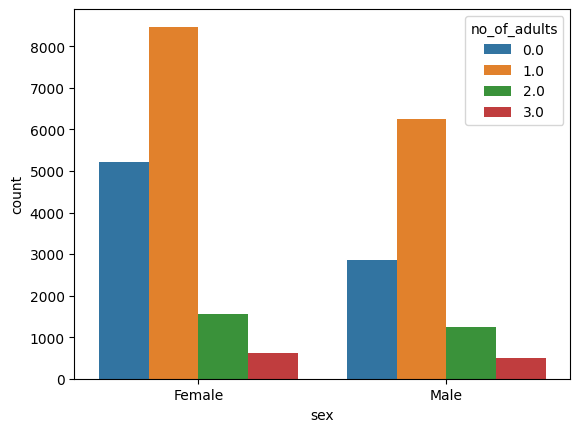

In [33]:
sns.countplot(x='sex',hue='no_of_adults',data=vaccine_df)
plt.show()

In [34]:
cat_columns=['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']
enc = LabelEncoder()
for column in cat_columns:
    vaccine_df[column] = enc.fit_transform(vaccine_df[column])

In [35]:
X = vaccine_df.drop(['h1n1_vaccine'],axis=1)
Y = vaccine_df['h1n1_vaccine']

In [36]:
X_train, X_test, Y_train, Y_test = split(X,Y, test_size=0.3,random_state=1)

In [37]:
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [38]:
model1.score(X_train,Y_train)

0.8333689953995934

In [39]:
model1.score(X_test,Y_test)

0.8406339697990765

In [40]:
model2 = SVC()
model2.fit(X_train, Y_train)

SVC()

In [41]:
model2.score(X_train,Y_train)

0.8367390606611748

In [42]:
model2.score(X_test,Y_test)

0.8378884312991389

In [43]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [44]:
model3.score(X_train,Y_train)

0.8221889376270461

In [45]:
model3.score(X_test,Y_test)

0.8299014102084113

In [46]:
model4 = BaggingClassifier(n_estimators=90,base_estimator=model3)
model4.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=90)

In [47]:
model4.score(X_train,Y_train)

0.8229378410185086

In [48]:
model4.score(X_test,Y_test)

0.8315237738674653

In [49]:
model5 = AdaBoostClassifier(n_estimators=27)
model5.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=27)

In [50]:
model5.score(X_train,Y_train)

0.8310152990264256

In [51]:
model5.score(X_test,Y_test)

0.8408835642081617

In [52]:
model6 = GradientBoostingClassifier(n_estimators=30)
model6.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=30)

In [53]:
model6.score(X_train,Y_train)

0.8327270782069113

In [54]:
model6.score(X_test,Y_test)

0.8393859977536503

In [55]:
model7=RandomForestClassifier(n_estimators=200,max_depth=10)
model7.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [56]:
model7.score(X_train,Y_train)

0.8738097785385686

In [57]:
model7.score(X_test,Y_test)

0.8397603893672781

In [58]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)

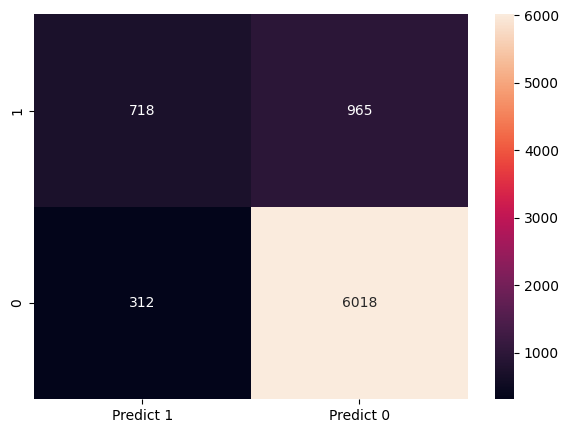

In [59]:
conf = cm(Y_test,y_pred1,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

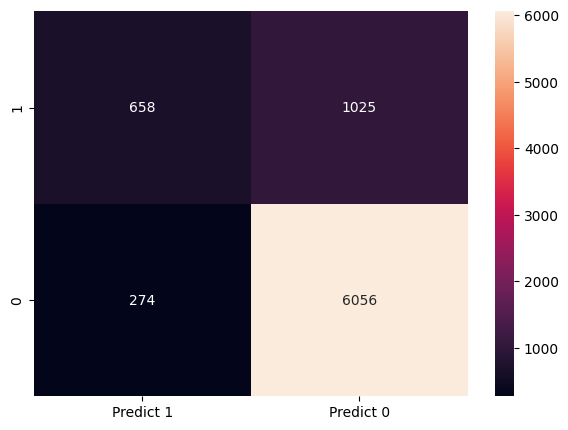

In [60]:
conf = cm(Y_test,y_pred2,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

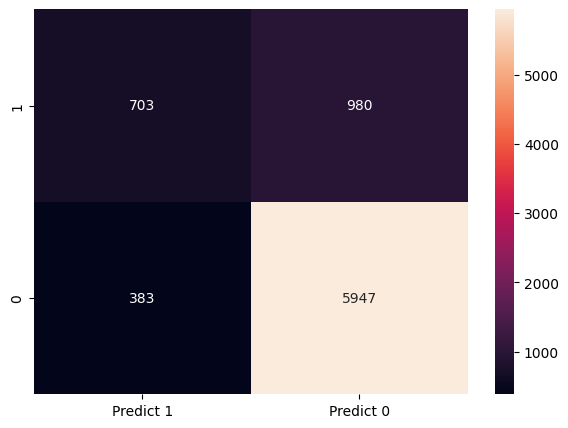

In [61]:
conf = cm(Y_test,y_pred3,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

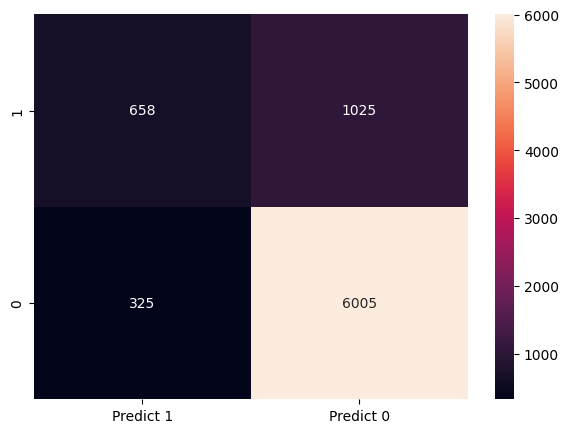

In [62]:
conf = cm(Y_test,y_pred4,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

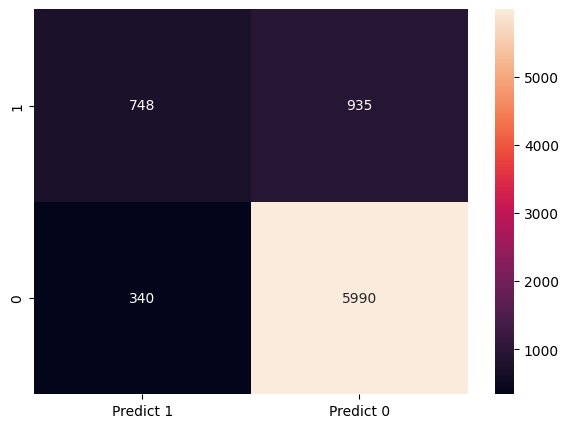

In [63]:
conf = cm(Y_test,y_pred5,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

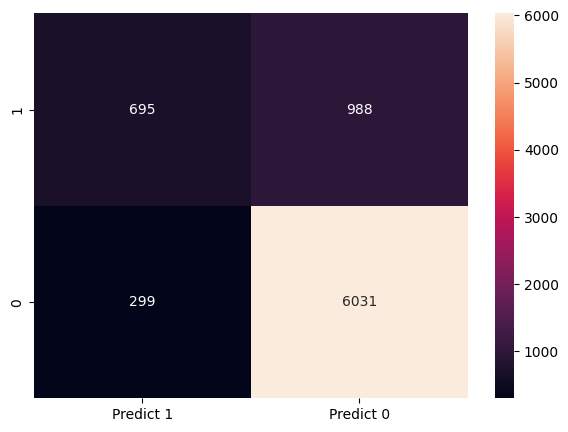

In [64]:
conf = cm(Y_test,y_pred6,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

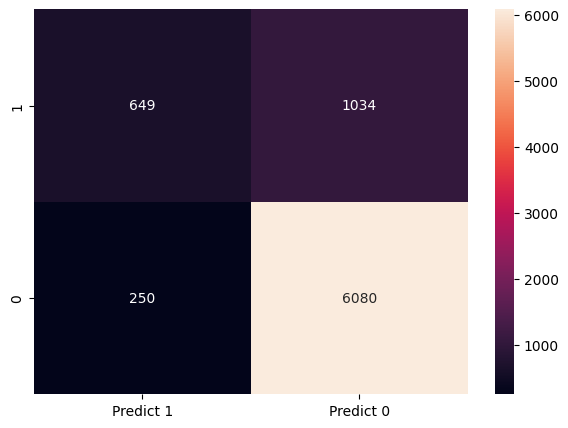

In [65]:
conf = cm(Y_test,y_pred7,labels=[1,0])
df_cm = pd.DataFrame(conf, index=[i for i in ["1","0"]],
                     columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()